# LendingClubCaseStudy

##  Importing the required Modules


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#To Supress Warnings
import warnings
warnings.filterwarnings("ignore")

## Reading recorded data from csv file 

In [23]:
data = pd.read_csv('loan.csv' , low_memory=False) #low_memory=False used because Columns having mixed types

## Analysis of data and clean unwanted stuff

In [24]:
#Checking the first few rows
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [25]:
#checking the last few rows
data.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

In [26]:
#Shape of data frame
data.shape

(39717, 111)

In [28]:
#Looks like there are many columns having lot of missing values
#check the missing values in each columns
Missing_values = data.isnull().sum()
#Max missing value is 39717 in some column so removign the column which is having more then 30% of total missing value in one column
Missing_values[Missing_values > 12000]

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


In [29]:

data.drop(Missing_values[ Missing_values > 12000 ].index, axis=1, inplace=True)

In [30]:
data.shape        #58 coulmn has been removed from data which are having more then 30% of each column's missing value

(39717, 53)

In [32]:
#Finding the unique value in every column
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

### 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' columns have only one unique value in all the rows, which will not give any usefull info for us. Hence removing them.

In [33]:
#Dropping Columns with only one unique value.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [34]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

### emp_title and title columns have text values which are more unique values but not helpful
### id, url, and member_id having all unique values which means any one of these can be used as primary key
### Let's use id as primary key and remove url and member id columns.

In [35]:
data.drop(['emp_title', 'title' ,'member_id', 'url' ], axis=1, inplace=True)

### total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv variables are valid for borrowers who already took loan. As we are only interested only in loan application details these columns can be removed. 
### recoveries, collection_recovery_fee columns are only valid for charged off loans.
## Hence, these columns can be removed.

In [36]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [37]:
#Again checking the shape of dataframe
data.shape

(39717, 31)

In [40]:
#Checking the Missing values again
Missing_values = data.isnull().sum()
Missing_values

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

### emp_length ,revol_util ,pub_rec_bankruptcies still contains missing values, Hence removing them

In [42]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [44]:
#Checking the Missing values again
Missing_values = data.isnull().sum()
Missing_values

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
dtype: int64

### There is no missing values in any of the Column

In [45]:
data.shape

(37898, 31)

### Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off. So, we will remove the rows with Current values in loan status as they are still paying.

In [46]:
#Removing current loan status rows
data = data[data.loan_status != 'Current']

In [47]:
#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [48]:
#Stripping empty space in values in the beginning of column term
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [49]:
#Finally we have number of rows and Columns
data.shape

(36800, 31)

### int_rate and revol_util are having '%' symbol values . Let's remove % at the end

In [50]:
data['int_rate'] = data.int_rate.str.strip('%')
data['revol_util'] = data.revol_util.str.strip('%')

In [51]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term int_rate  \
0  1077501       5000         5000           4975.0  36 months    10.65   
1  1077430       2500         2500           2500.0  60 months    15.27   
2  1077175       2400         2400           2400.0  36 months    15.96   
3  1076863      10000        10000          10000.0  36 months    13.49   
5  1075269       5000         5000           5000.0  36 months     7.90   

   installment grade sub_grade emp_length  ... inq_last_6mths  open_acc  \
0       162.87     B        B2  10+ years  ...              1         3   
1        59.83     C        C4   < 1 year  ...              5         3   
2        84.33     C        C5  10+ years  ...              2         2   
3       339.31     C        C1  10+ years  ...              1        10   
5       156.46     A        A4    3 years  ...              3         9   

  pub_rec revol_bal revol_util total_acc   total_pymnt total_pymnt_inv  \
0       0     13648      83.70         9   5863.155187         5833.84   
1       0      1687       9.40         4   1008.710000         1008.71   
2       0      2956      98.50        10   3005.666844         3005.67   
3       0      5598         21        37  12231.890000        12231.89   
5       0      7963      28.30        12   5632.210000         5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies  
0           171.62                   0.0  
1           119.66                   0.0  
2           649.91                   0.0  
3           357.48                   0.0  
5           161.03                   0.0  

[5 rows x 31 columns]

## Data type Conversions

In [52]:
#First check the data type of all columns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

### int_rate and revol_util are of object data types but values are in float. So need to convert from object to float

In [53]:
data['int_rate'] = data.int_rate.astype(float)
data['revol_util'] = data.revol_util.astype(float)

### issue_d, earliest_cr_line are having date values, Need to Convert data type to date.

In [54]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')

In [56]:
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [57]:
data['issue_d'].head()    #Just to check the format

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

## Derived Variables for analysis 

## create new columns from date type columns

In [58]:
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

## Univariate Analysis

In [199]:
#creating buckets based on the [ercentile cut for few of the columns
data['intrate_Bucket'] = pd.qcut(data.int_rate, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
data['dti_bucket'] = pd.qcut(data.dti, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
data['annual_inc_bucket'] = pd.qcut(data.annual_inc, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
data['data_amnt_bucket'] = pd.qcut(data.loan_amnt, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
data['revol_util_bucket'] = pd.qcut(data.revol_util, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
data['revol_bal_bucket'] = pd.qcut(data.revol_bal, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])


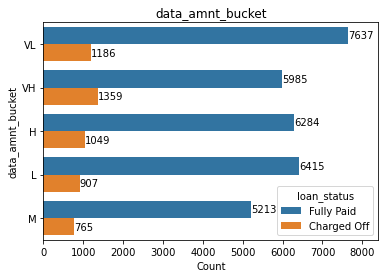

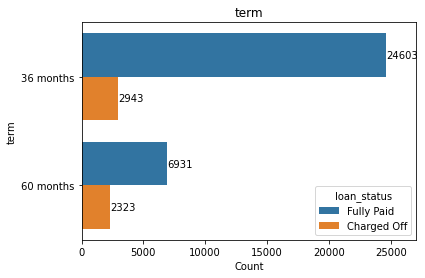

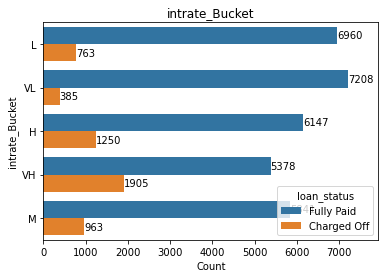

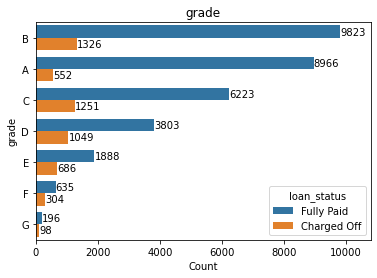

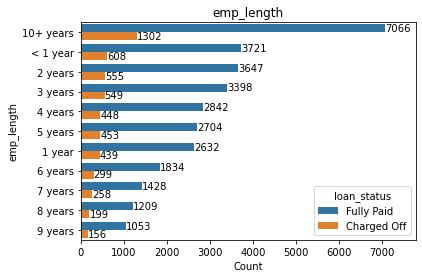

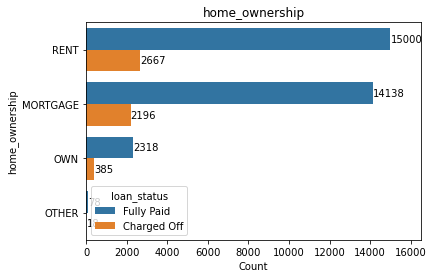

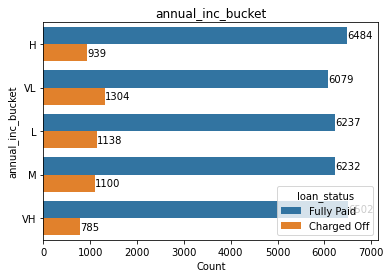

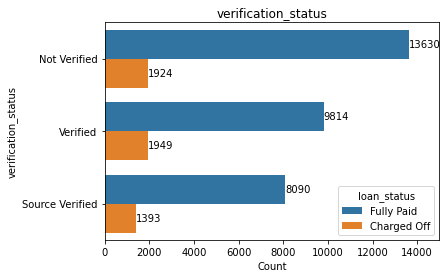

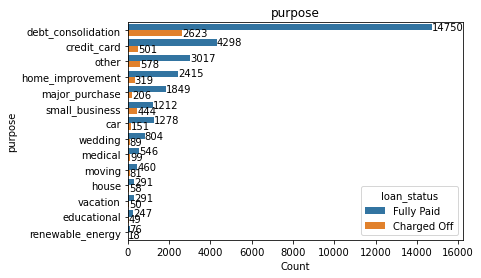

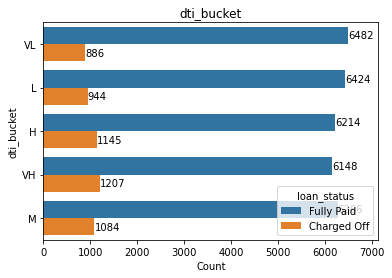

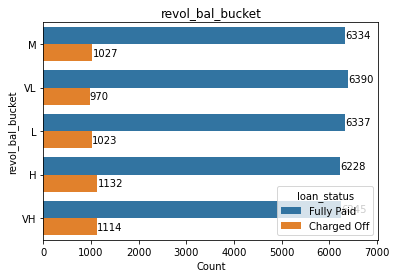

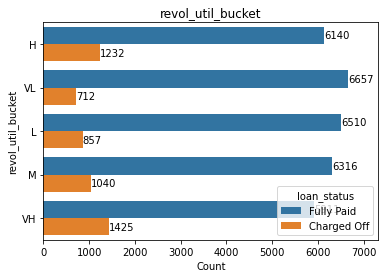

In [233]:
#Using count plot to understand the most occurances of few parameters as part of univariate analysis
columnsArray = ['data_amnt_bucket','term','intrate_Bucket','grade','emp_length','home_ownership','annual_inc_bucket','verification_status','purpose','dti_bucket','revol_bal_bucket','revol_util_bucket']


for datacolumn in columnsArray:
    ax =  sns.countplot(data=data, y=datacolumn, hue='loan_status',  order=data[datacolumn].value_counts().index)
# get the total count of the type column
    total = data[datacolumn].count()

# annotate the bars with fmt from matplotlib v3.7.0
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
# add space at the end of the bar for the labels
    ax.margins(x=0.1)

    ax.set(xlabel='Count', ylabel=datacolumn, title=datacolumn)
    plt.show()

## Segmented Univariate Analysis

## Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

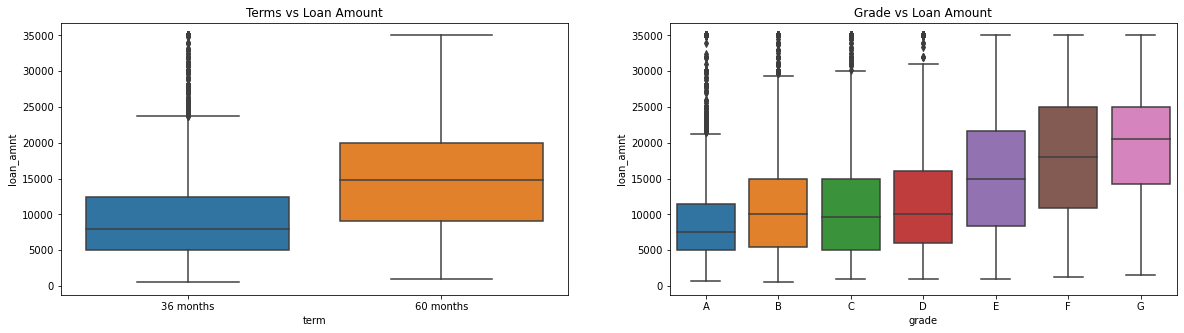

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(1,2,2)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

### Observations:
### Higher amount loans have high tenure i.e, 60 months.
### Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing. 

<AxesSubplot:title={'center':'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

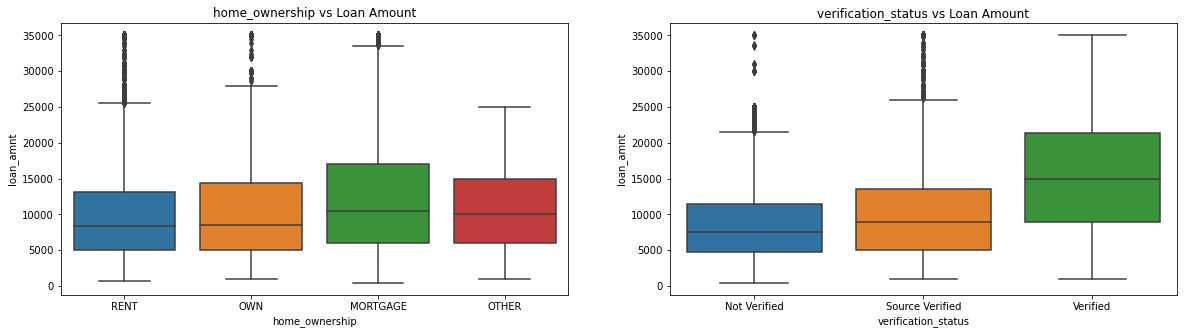

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

## Observations:
### More borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

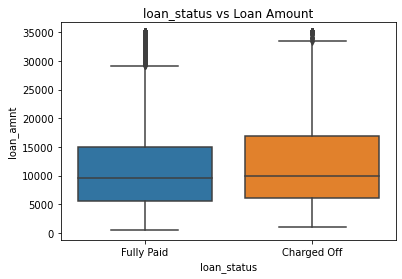

In [95]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

## Observations:
### Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

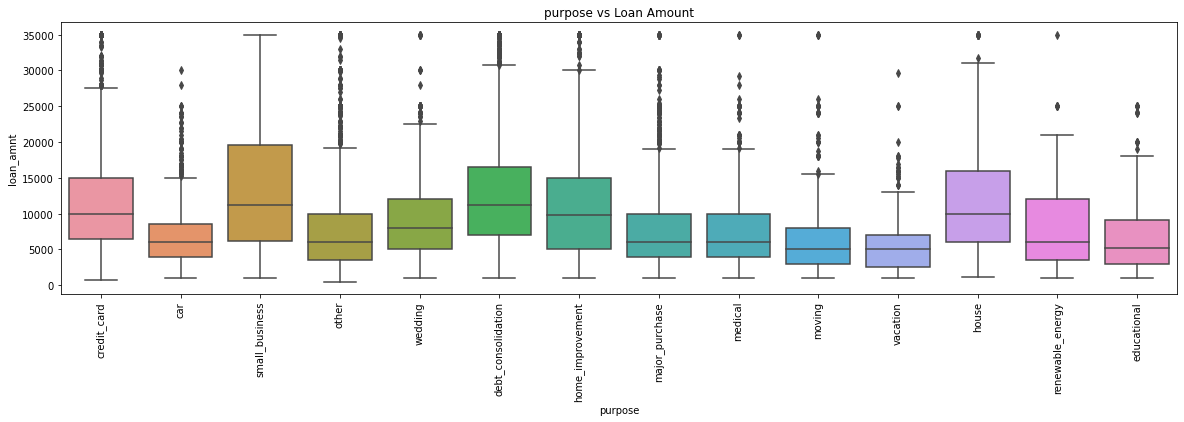

In [96]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

## Observations:
### More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

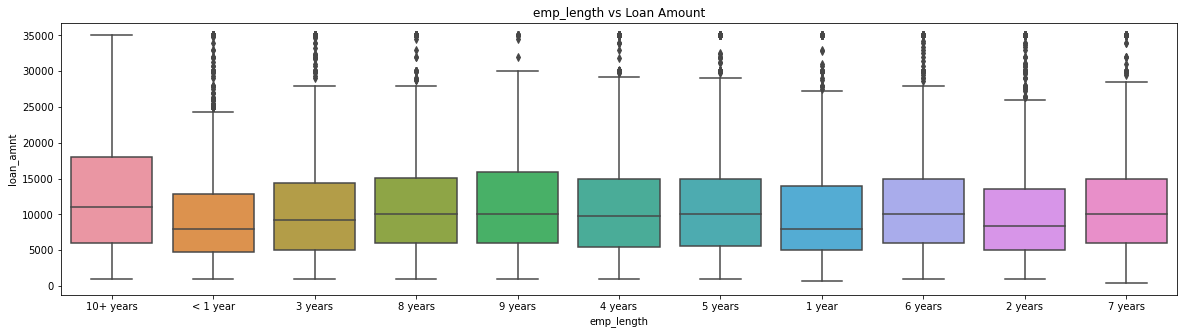

In [97]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

## Observations:
### More borrowers are from 10+ years and least is <1 year

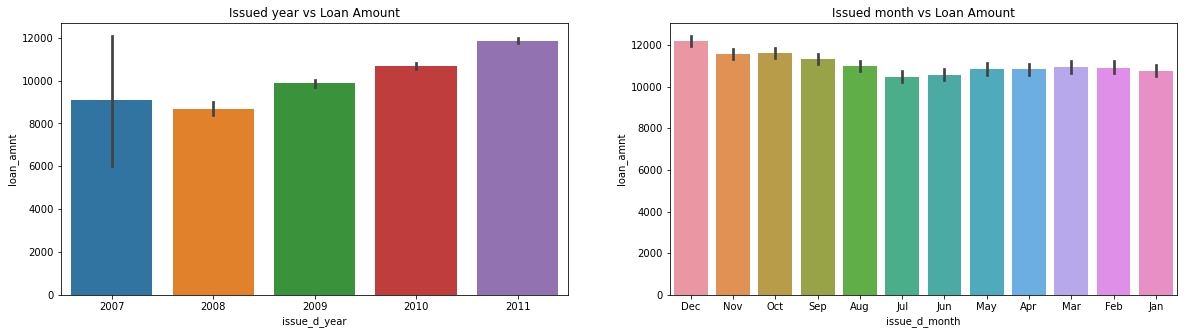

In [223]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.barplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

## Observations:

### The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

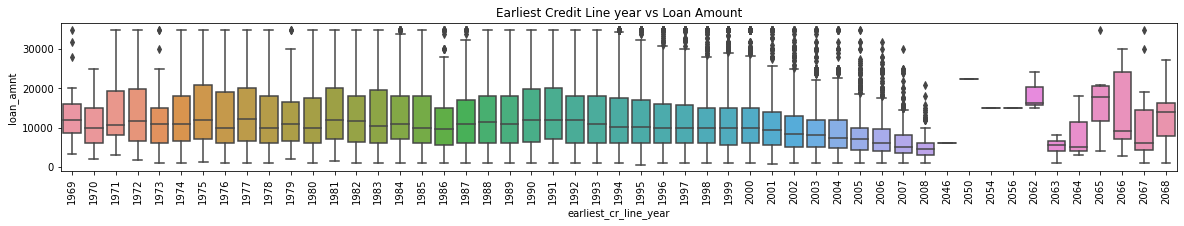

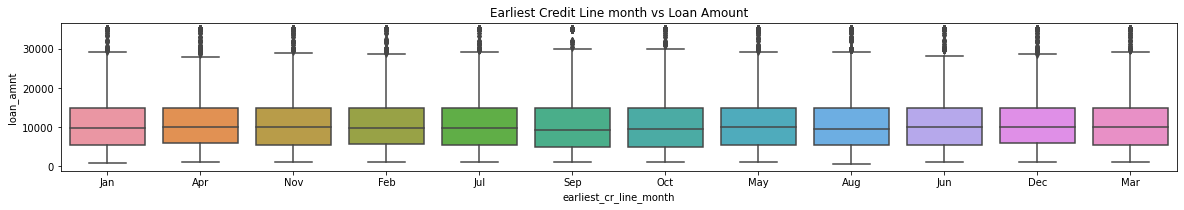

In [99]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

## Observations:
### Borrowers who go earliest credit line in 2066 got wide spreaded amount of loans than others.

## funded_amnt

<AxesSubplot:title={'center':'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

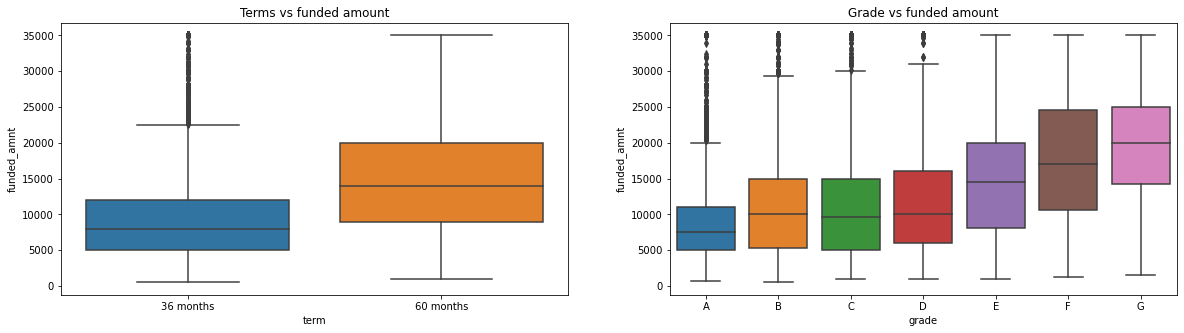

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

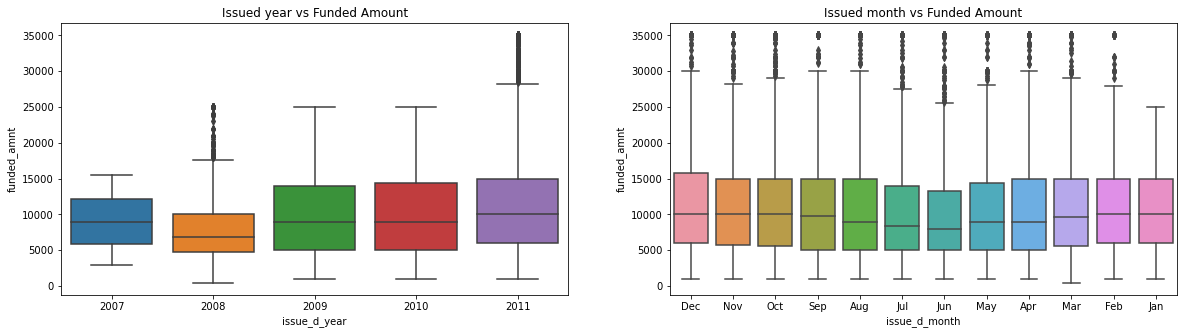

In [101]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.funded_amnt, data=data)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.funded_amnt, data=data)
plt.title('Issued month vs Funded Amount')
plt.show()

Text(0.5, 1.0, 'loan_status vs Funded amnt')

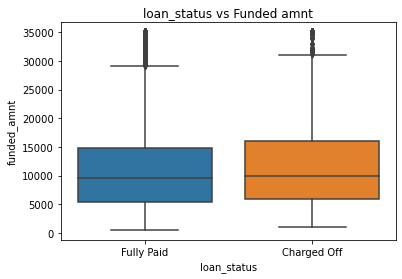

In [102]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

Text(0.5, 1.0, 'purpose vs funded amount')

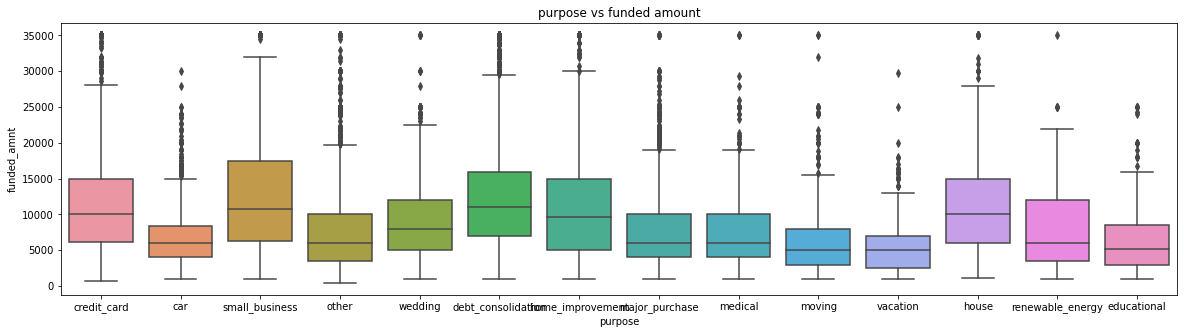

In [103]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')

Text(0.5, 1.0, 'emp_length vs funded amount')

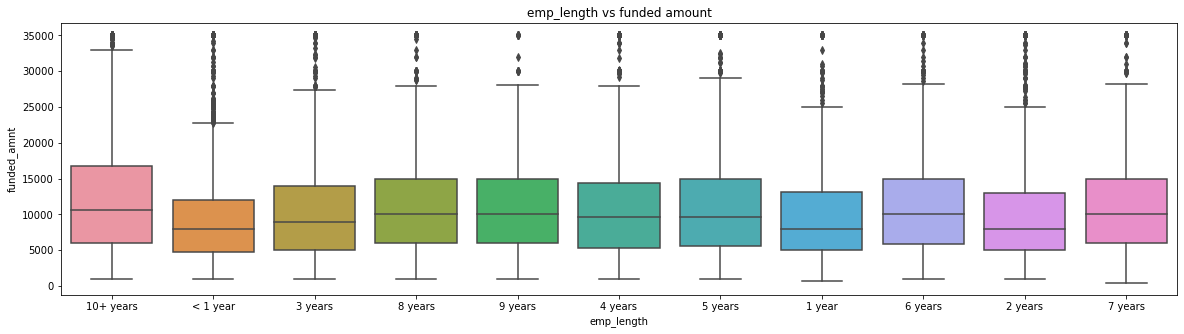

In [104]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

## Observations:
### The Funded Amount has similar observations as Loan Amount.

## Interest Rate

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

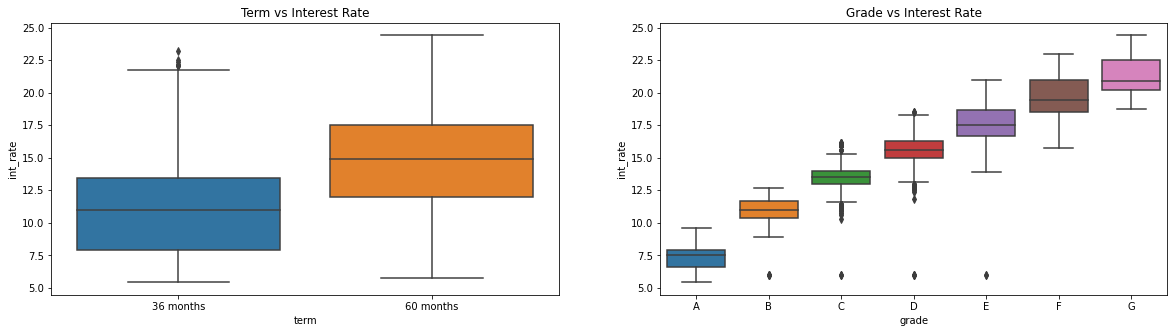

In [105]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

## Observation:
### The interest rates are higher for Higher tenure loans And Also Interest Rates are Higher as Grades are Lowering (A to G).

<AxesSubplot:title={'center':'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

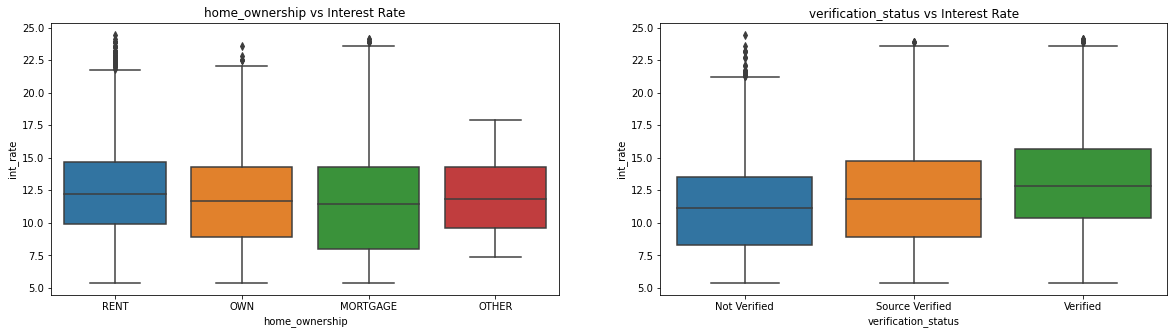

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

## Observations:

### Borrowers with Own and Mortgage got loans with less interest rates as the security will be there and The Non Verified Borrowers got less interest rates compared to Verified and Source Verified borrowers.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

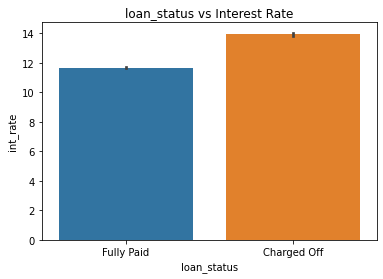

In [197]:
sns.barplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

## Observations:
### This clearly tells us, grater the interest rate more the chance of Defaulting the loan.

Text(0.5, 1.0, 'purpose vs Interest Rate')

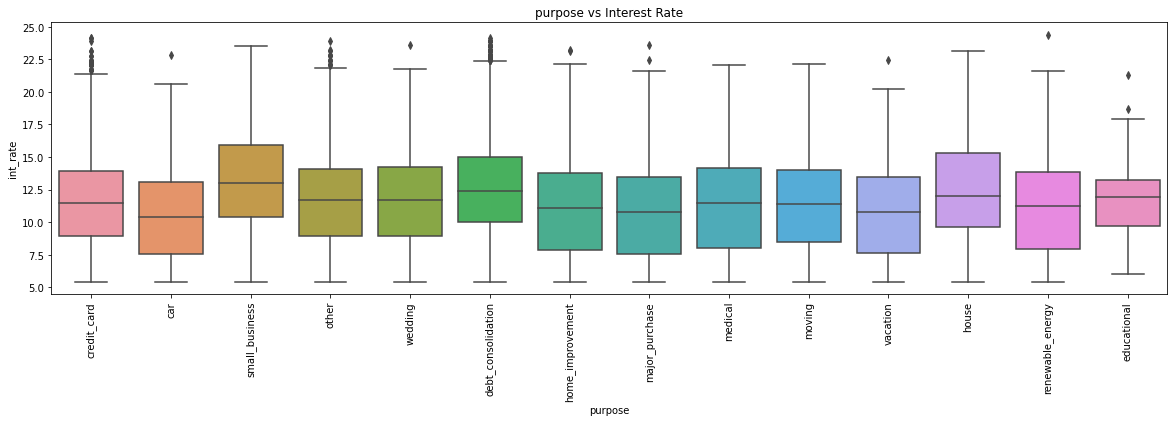

In [108]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

## Observations:
### Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

Text(0.5, 1.0, 'emp_length vs Interest Rate')

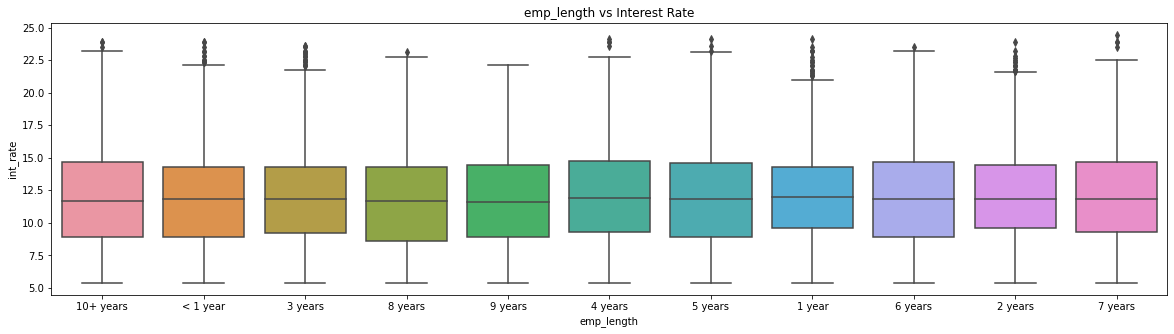

In [109]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.int_rate, data=data)
plt.title('emp_length vs Interest Rate')

## Observations:
### Looks like there is no much relation between Employment length and interest rate

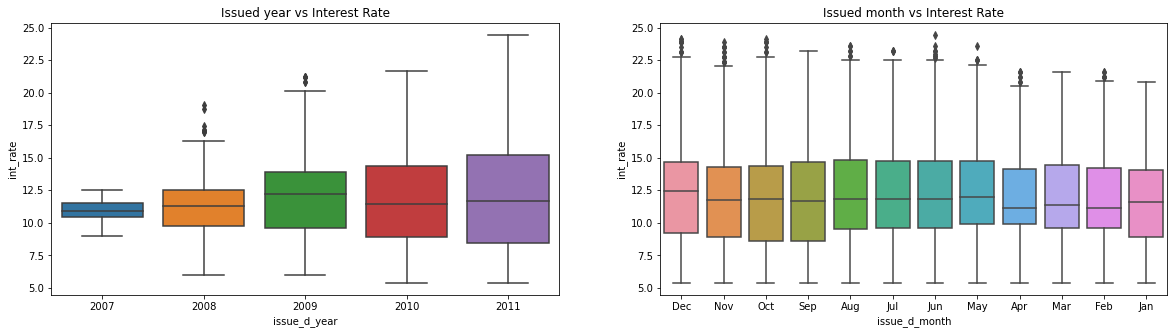

In [110]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.int_rate, data=data)
plt.title('Issued month vs Interest Rate')
plt.show()

## Observations:
### As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.

## Annual Income 

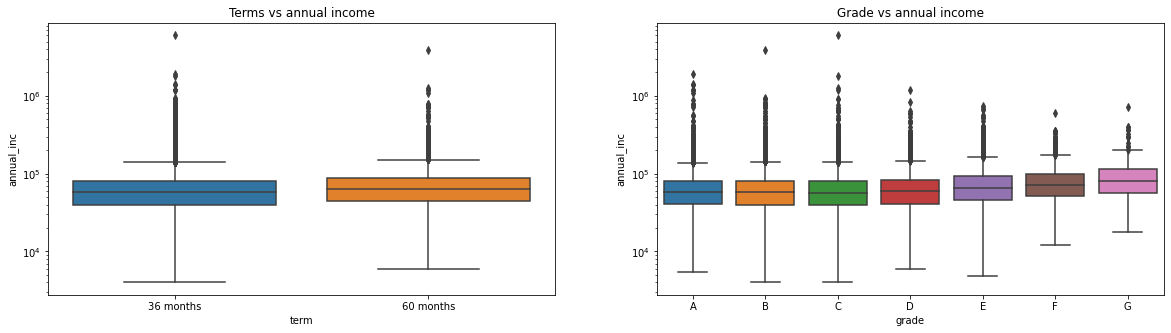

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

## Observations:
### Comparatively Annual income is higher for lower grades.

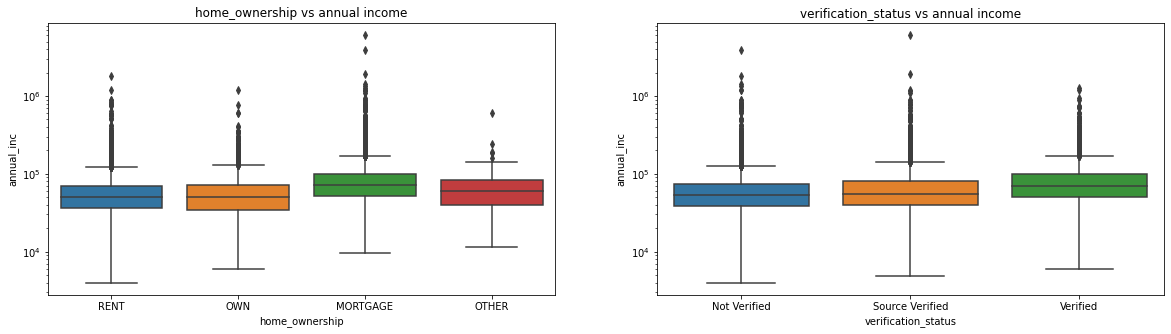

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

## Observations:
### The home ownership status for MORTAGE has higher income.The income source was verfied for most of the borrower's who had higher annual incomes.

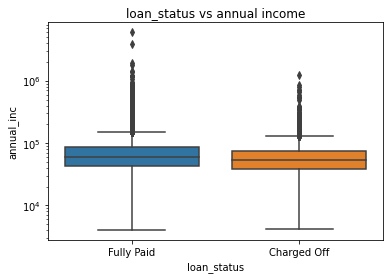

In [113]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

## Observations:
### Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

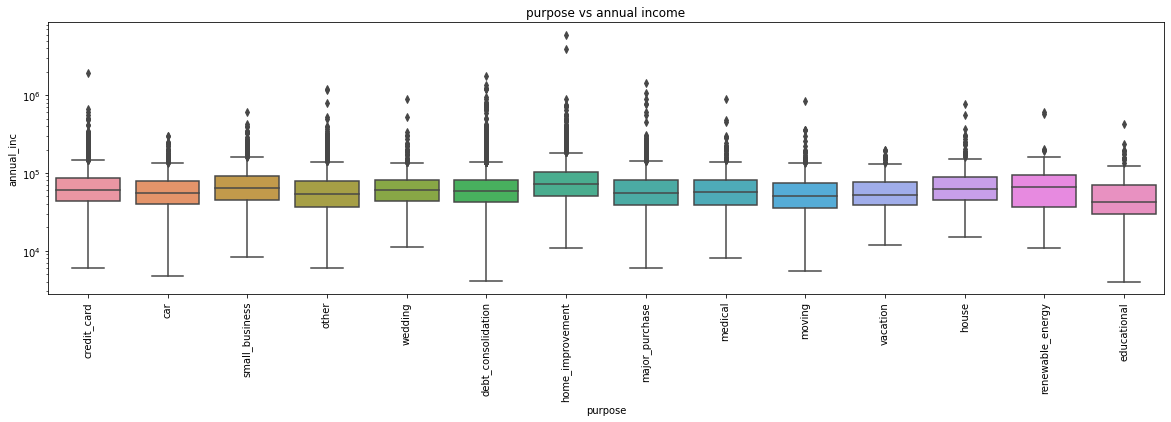

In [114]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

## Observations:
### A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

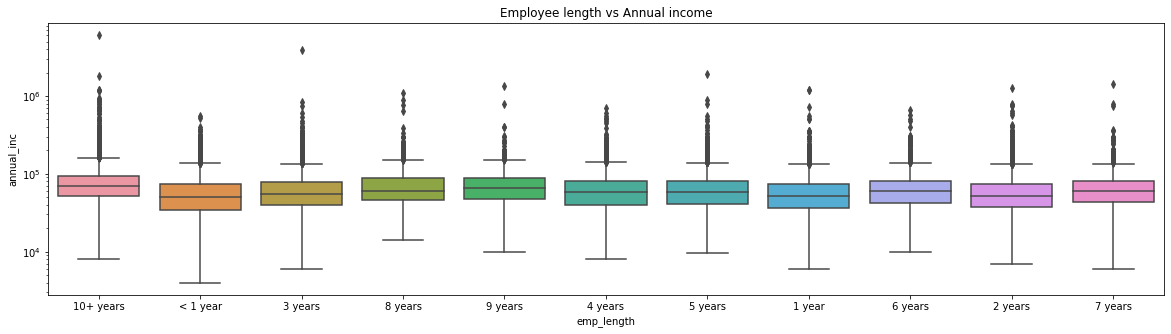

In [115]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

## Observations:
### The borrower's who has higer income have taken loans for 10+ years of duration.

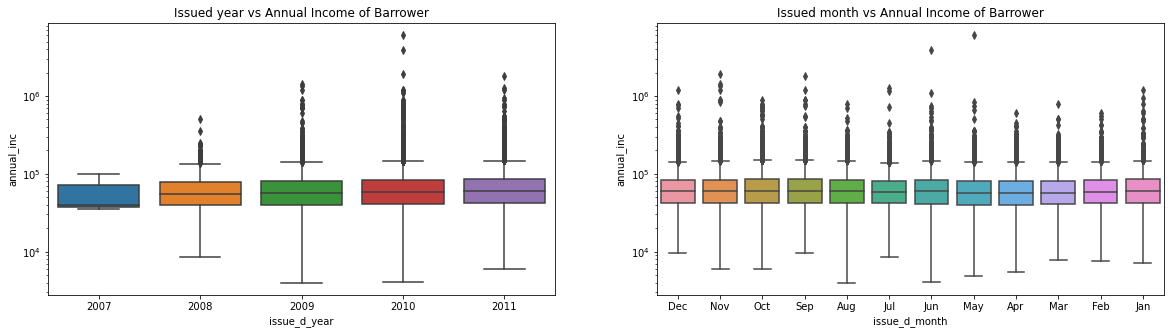

In [116]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.annual_inc, data=data)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

## Observations:
### Annual income has no impact with the month when the loan was funded

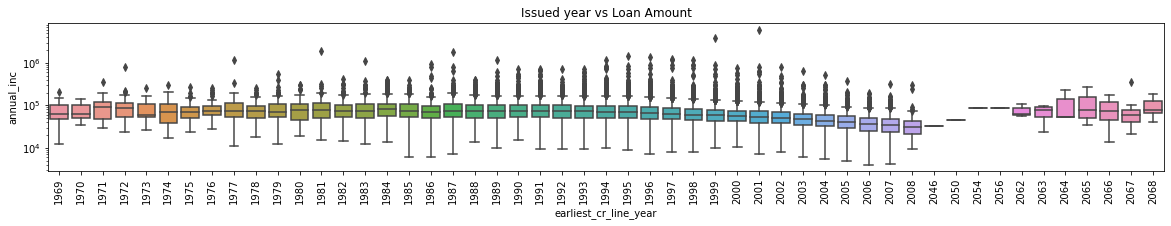

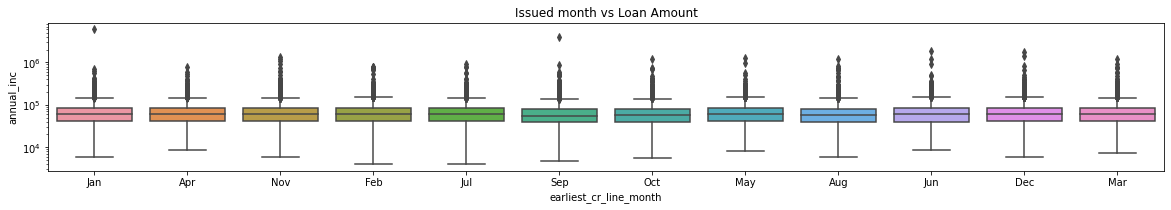

In [117]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

## Observations:
### There is not specific pattern in the annual income and earliest Credit line year and month.

## DTI

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

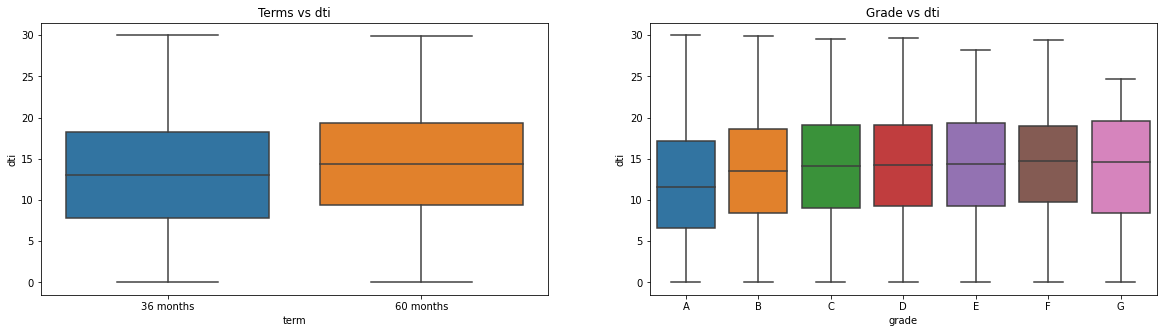

In [118]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

## Observation:
DTI is bit high for people who got more tenure i.e., 60 months.
A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

<AxesSubplot:title={'center':'verification_status vs dti'}, xlabel='verification_status', ylabel='dti'>

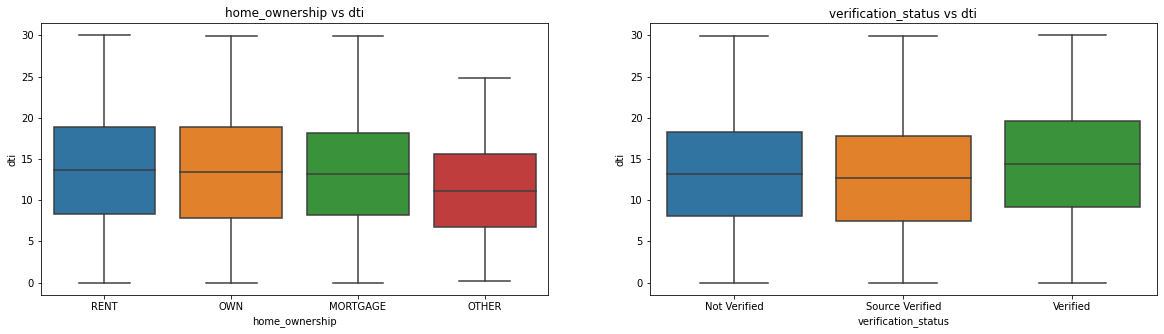

In [119]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.dti, order = verification_status_ord, data=data)

## Observations:
### People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

Text(0.5, 1.0, 'loan_status vs dti')

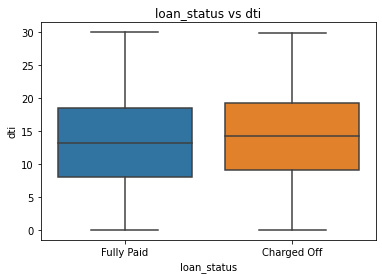

In [120]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

## Observations
### Borrowers with high DTI has bit more probability to default 

Text(0.5, 1.0, 'purpose vs dti')

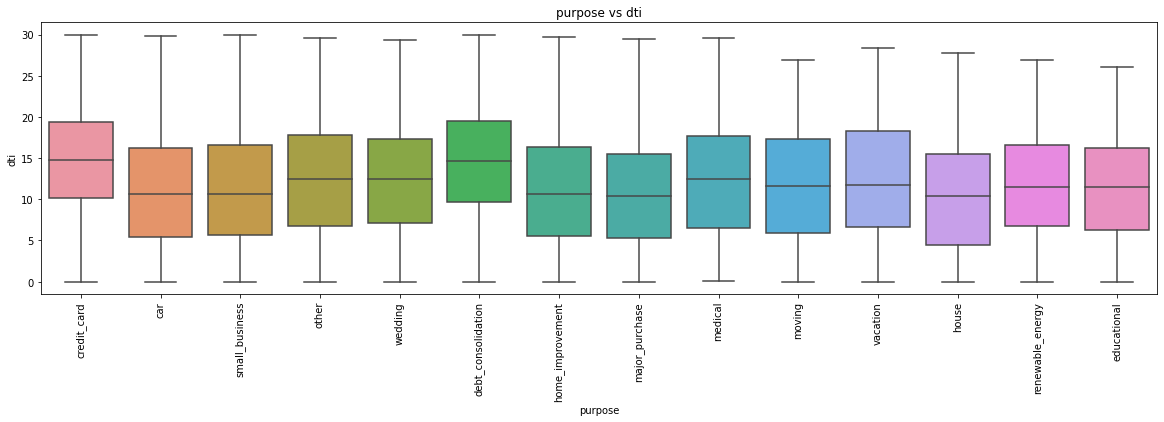

In [121]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

# Observations:
### People who took loan for credit card and debt consolidation purpose has more DTI than other purposes.

Text(0.5, 1.0, 'emp_length vs dti')

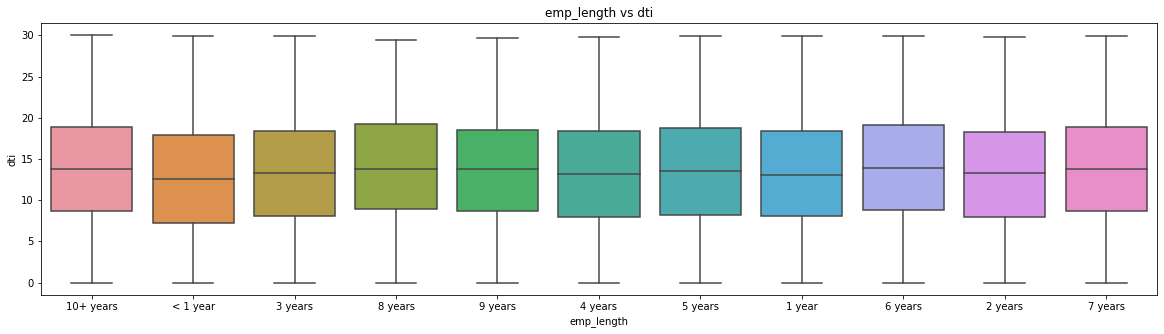

In [122]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('emp_length vs dti')

## Observations:
### The dti is pretti much similar for barrowers with all the employment length.

## Public Records

In [123]:
#Finding proportation of values in each value of category
df = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

pub_rec       term     id  proportion
0        0  36 months  26152    0.749964
1        0  60 months   8719    0.250036
2        1  36 months   1349    0.719467
3        1  60 months    526    0.280533
4        2  36 months     36    0.800000
5        2  60 months      9    0.200000
6        3  36 months      7    1.000000
7        4  36 months      2    1.000000

<AxesSubplot:title={'center':'Grade vs Public records'}, xlabel='pub_rec', ylabel='proportion'>

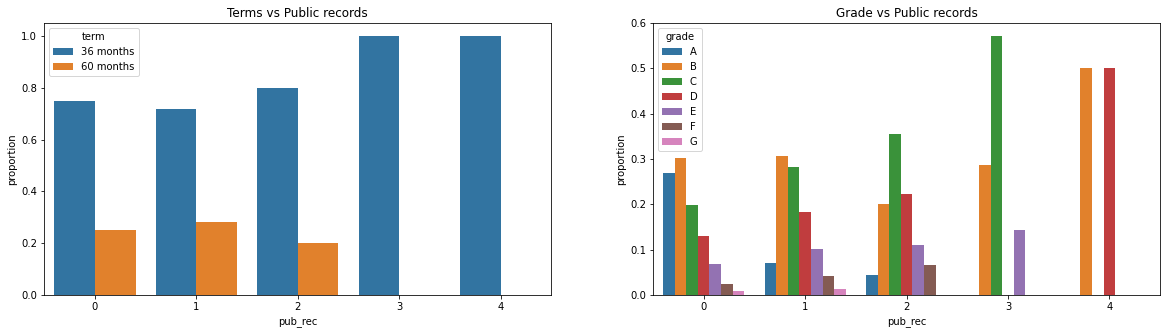

In [124]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

## Observations:

### Borrwers higher public derogatory records took loan for 36 months tenure. where as 80% and 20% distribution between 36 and 60months tenure for lower public derogatory records borrowers.We can see the grades are really showing some pattern. A grade people are having less derogatory records then other grades.Exceptionally C,D,E graded people are having high pub_recs.

Text(0.5, 1.0, 'Verification status vs Public records')

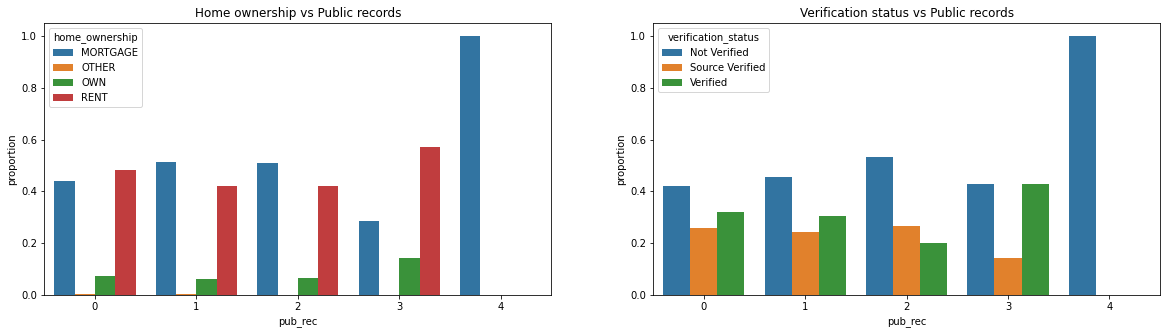

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')

## Observations:
### Borrowers with 4 public Derogatory records are high in mortgage owned house category and also Not verified Catogry of verification status.

Text(0.5, 0.98, 'loan status vs Public records')

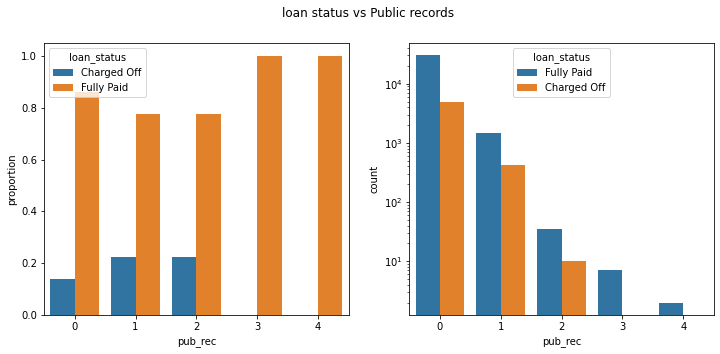

In [126]:
#Proportion of values for each category
df = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.yscale('log')
plt.suptitle('loan status vs Public records')

## Observations:
### The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

Text(0.5, 1.0, 'Purpose vs Public records')

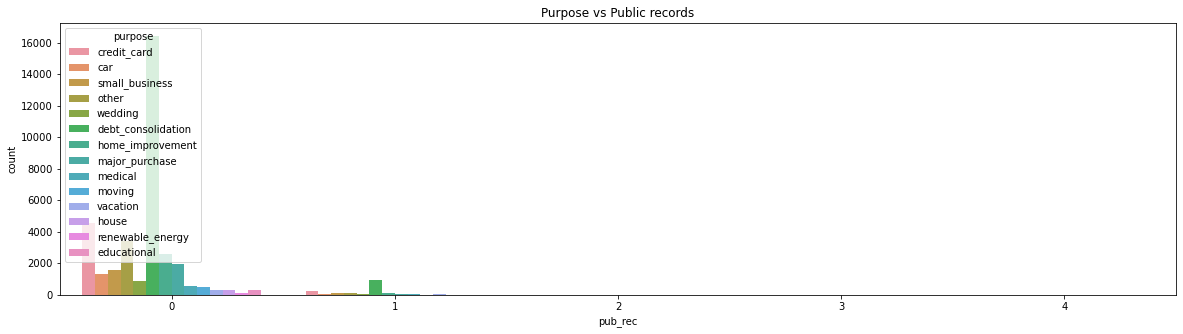

In [127]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec, hue='purpose', data=data)
plt.title('Purpose vs Public records')

Text(0.5, 1.0, 'Employee length vs Public records')

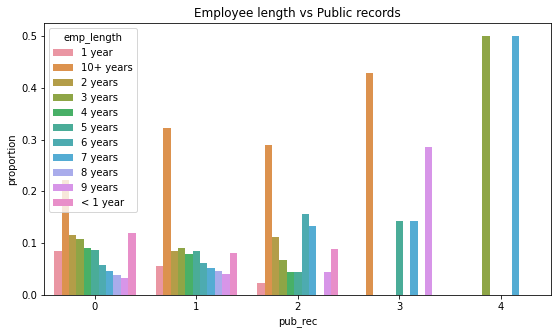

In [128]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = data.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')

## pub_rec_bankruptcies

<AxesSubplot:title={'center':'Grade vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

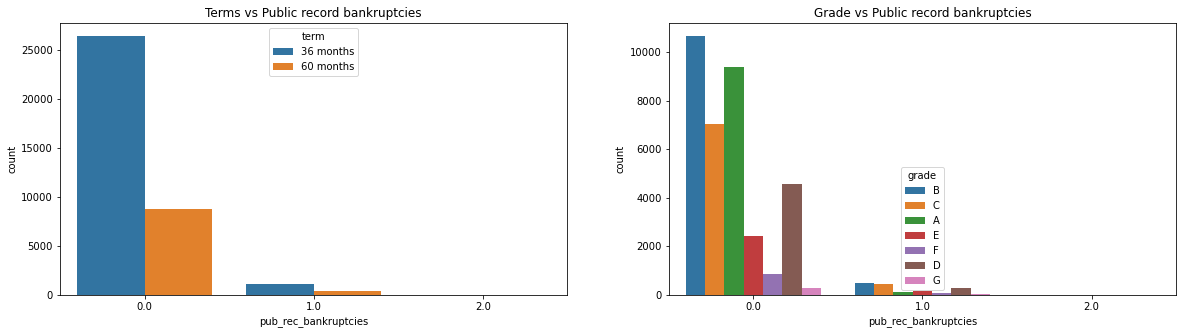

In [129]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='term', data=data)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='grade', data=data)

<AxesSubplot:title={'center':'Verification status vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

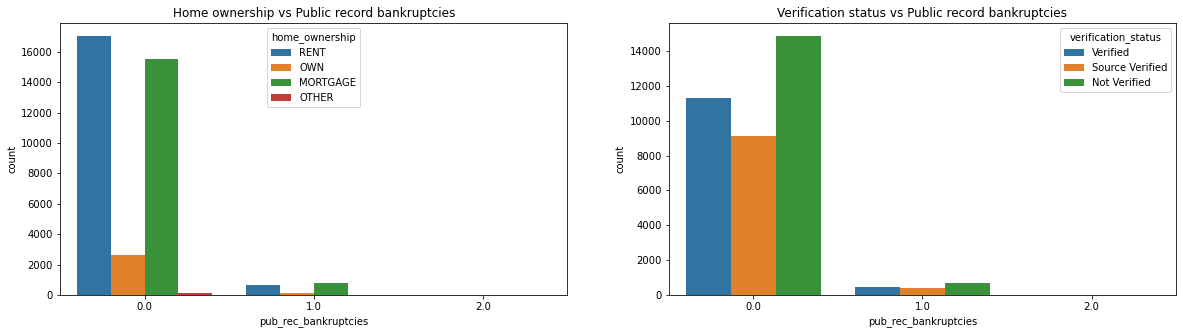

In [130]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

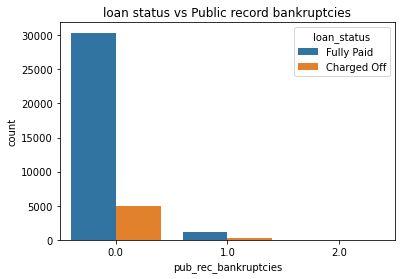

In [131]:
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('loan status vs Public record bankruptcies')

Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

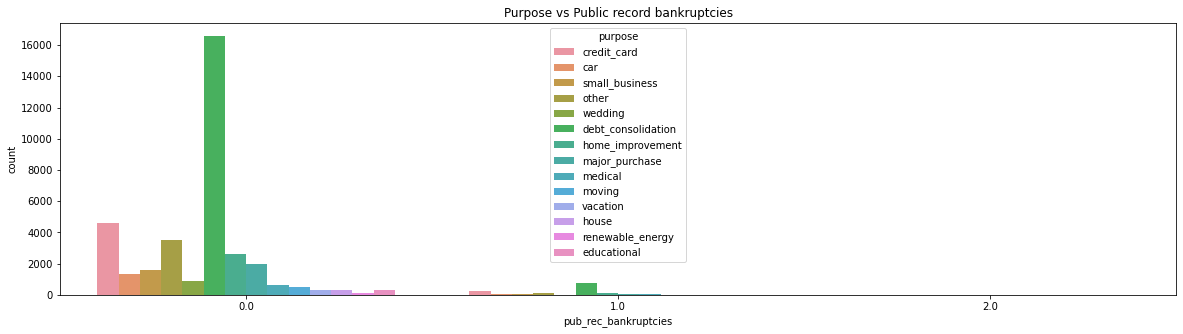

In [132]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')

Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

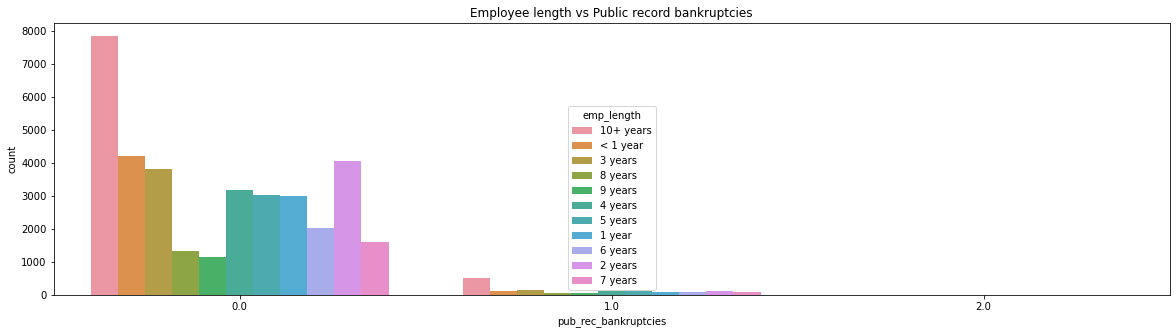

In [133]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')

## inq_last_6mths

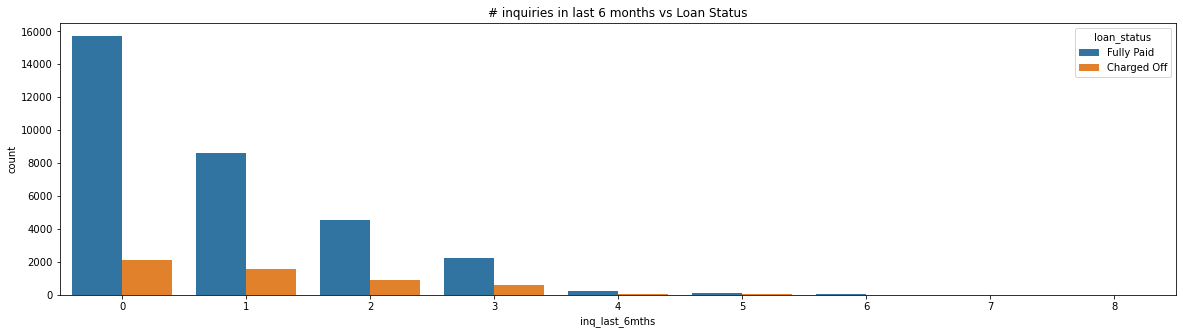

In [134]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()

## Bivariate Analysis

## 1. Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

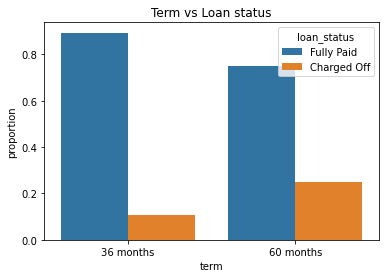

In [135]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

## Observations:
Looks like there are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

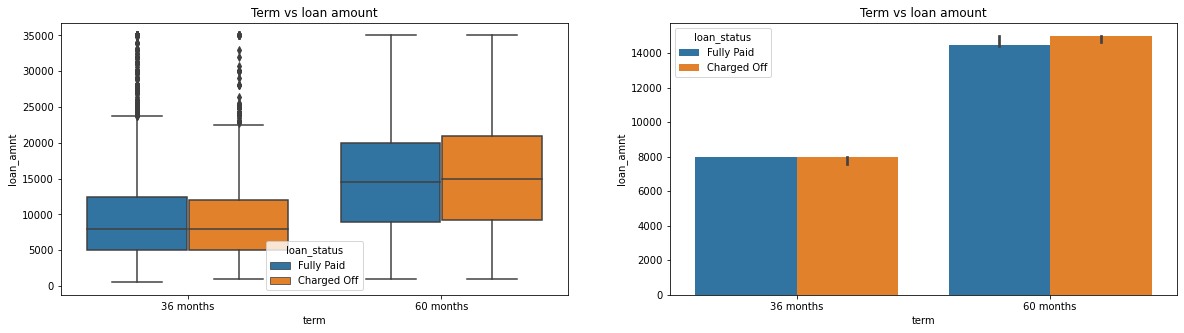

In [136]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

## Observations:
Loan amount is not a decider for defaults in both 36 adn 60 months.
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures. 

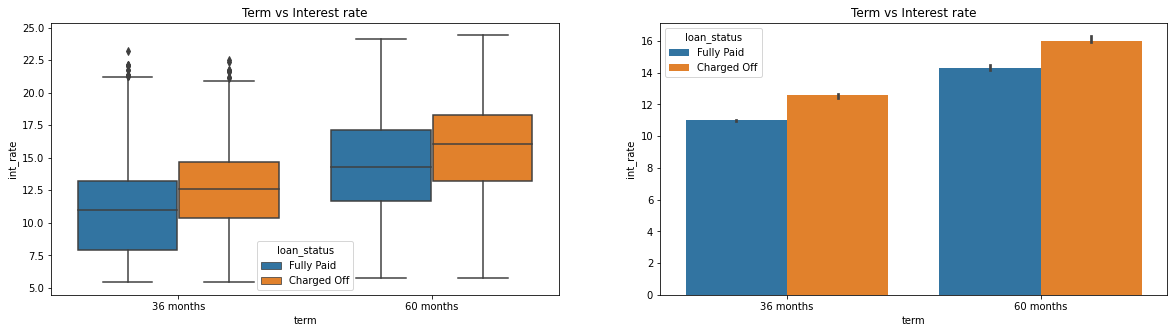

In [137]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

## Observations
For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

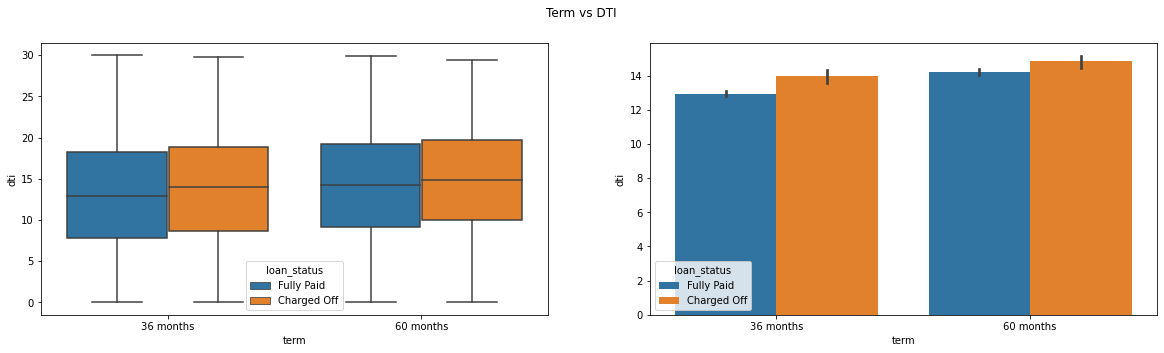

In [138]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

## Observations:
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio. 

## Grade

In [139]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

Text(0.5, 1.0, 'Grade vs Loan status')

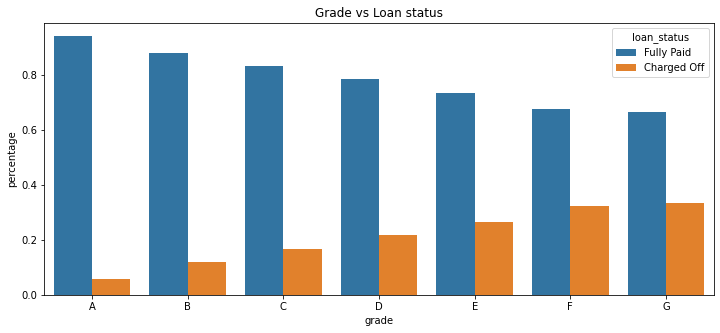

In [140]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

## Observations:
The above graph clearly says the Charged off increases as grades decreases.

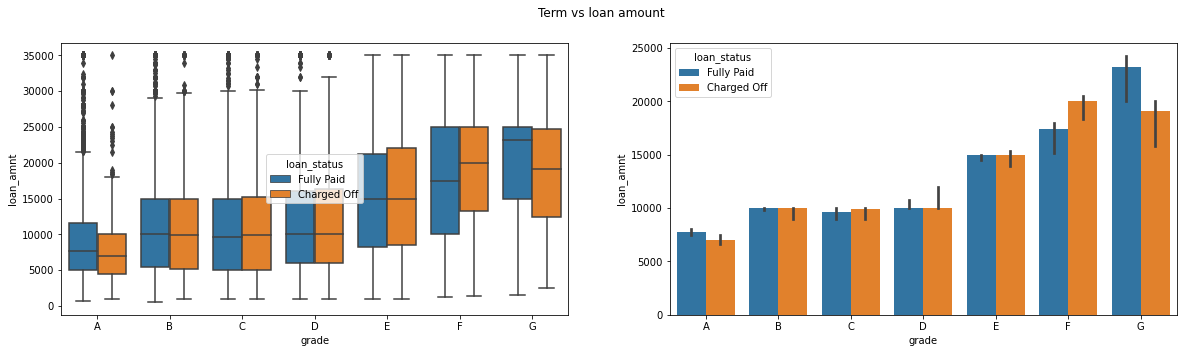

In [142]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(1,2,2)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

## Observations:

For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.
The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

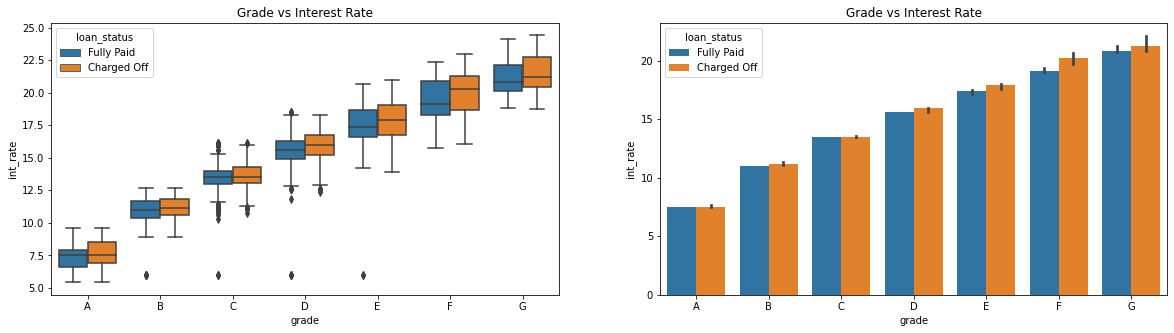

In [143]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(1,2,2)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

## Observations:
As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

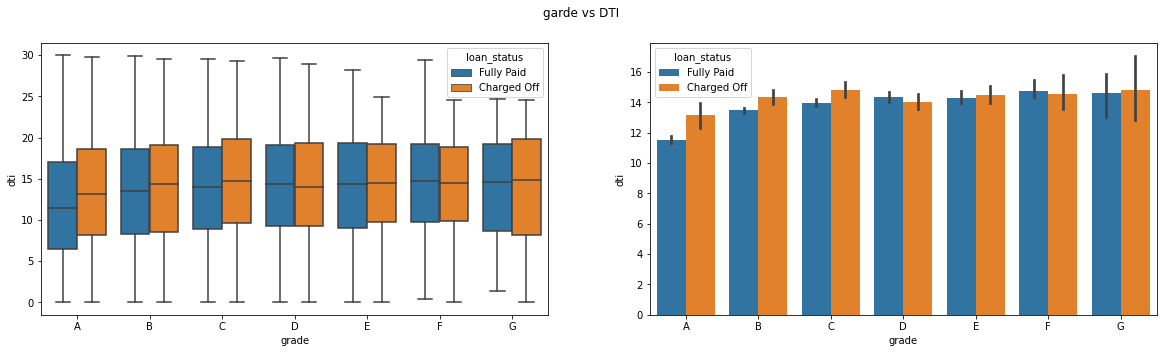

In [144]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(1,2,2)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

## Observations:
There is not much change in dti in each grade and loan status.

## Employment Length

Text(0.5, 1.0, 'Grade vs Loan status')

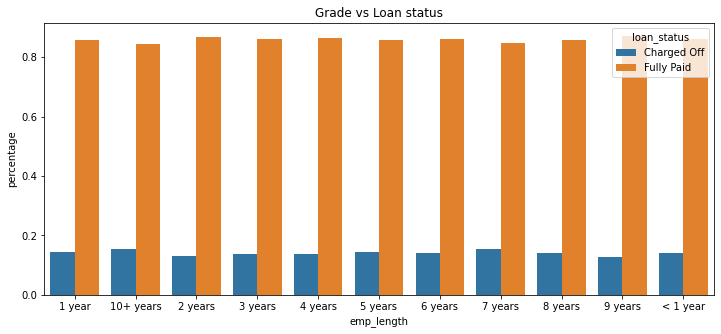

In [145]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

## Observations: There is not big changes or pattern observed defaulters across employment lengths.

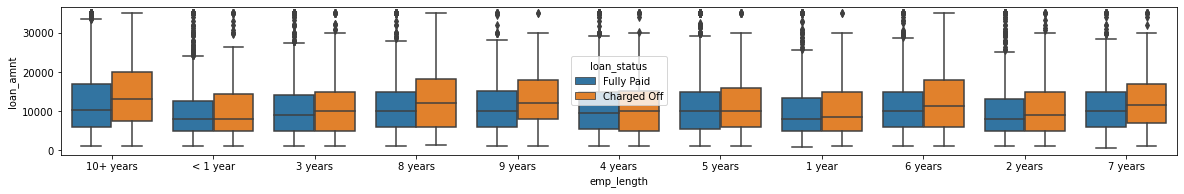

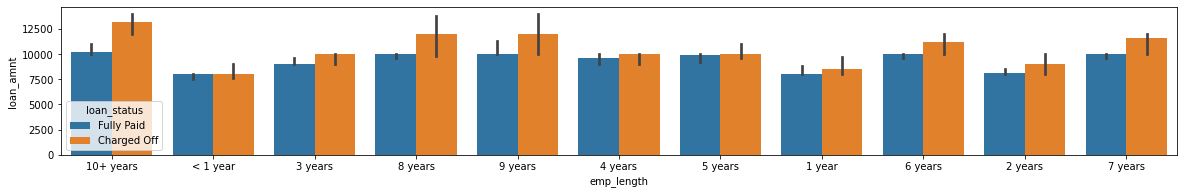

In [146]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(2,1,2)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

## Observations:
Borrowers with higher employment lengths and took more loan amounts got more default rate.

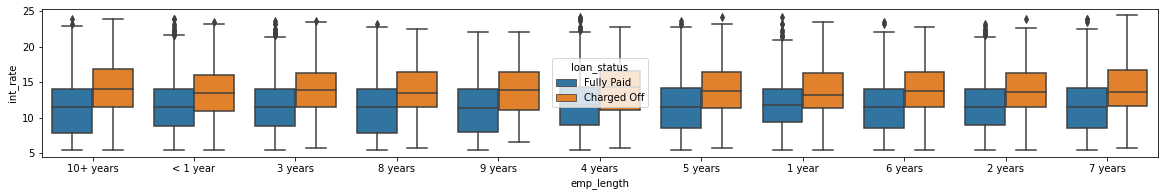

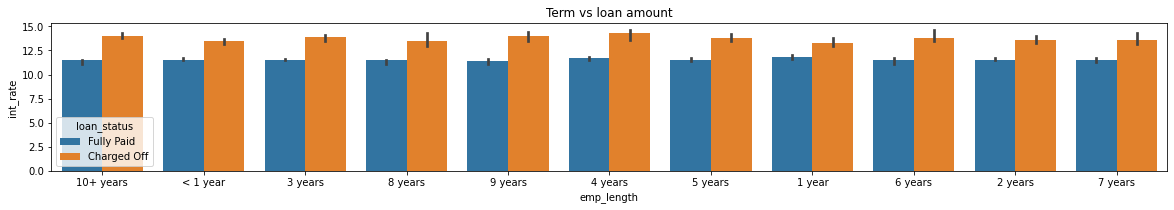

In [147]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(2,1,2)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

## Observations:
Irrespictive of employment length loans with more interest rates got defaulted more.

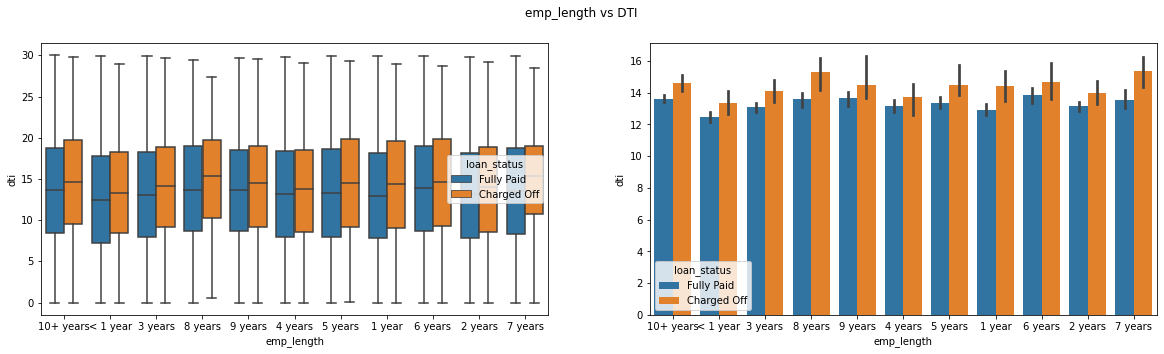

In [148]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()


## Observations:
Employment Length and DTI are not showing any patterns towards defaults.




## Home Ownership

Text(0.5, 1.0, 'Home Ownership vs Loan status')

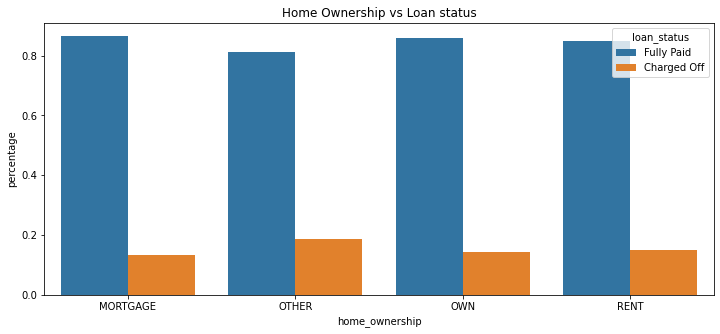

In [149]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

## Observations:
There is bit high percentage of defaults are recorded in other home ownership category.

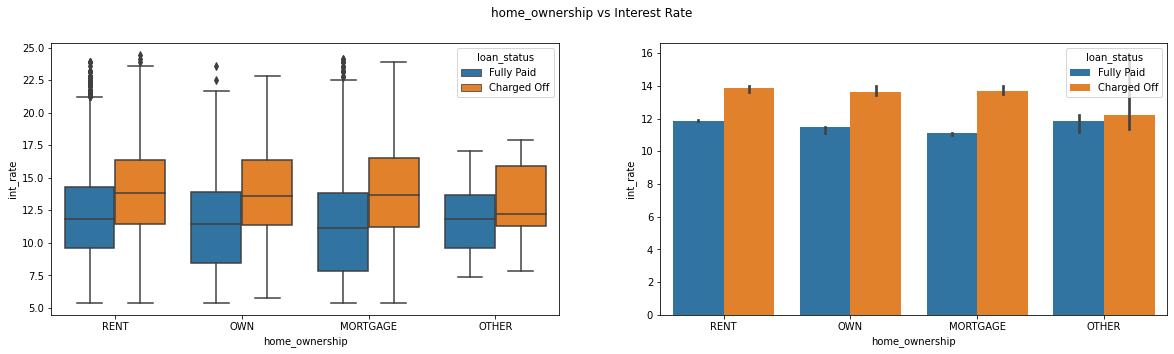

In [150]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

## Observations:
Irrespictive of Home owner ship, when the interest rate is high the dafault rate also high.

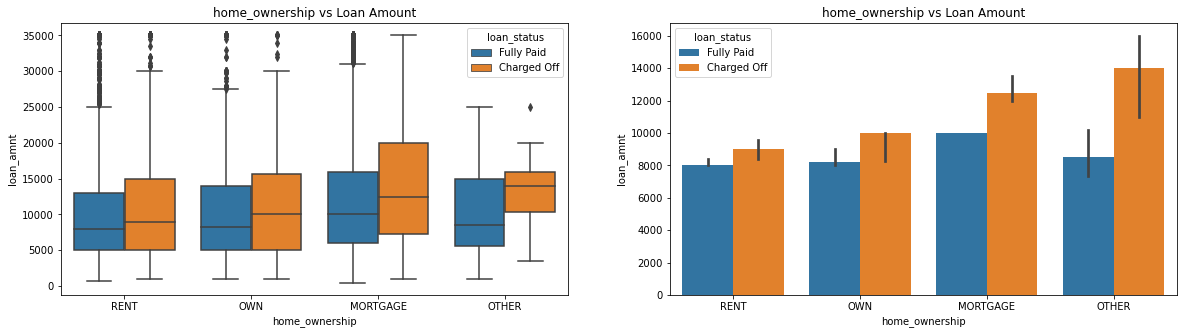

In [152]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(1,2,2)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

## Observations:
Borrowers who took higher loan amounts defaulted more than others. 

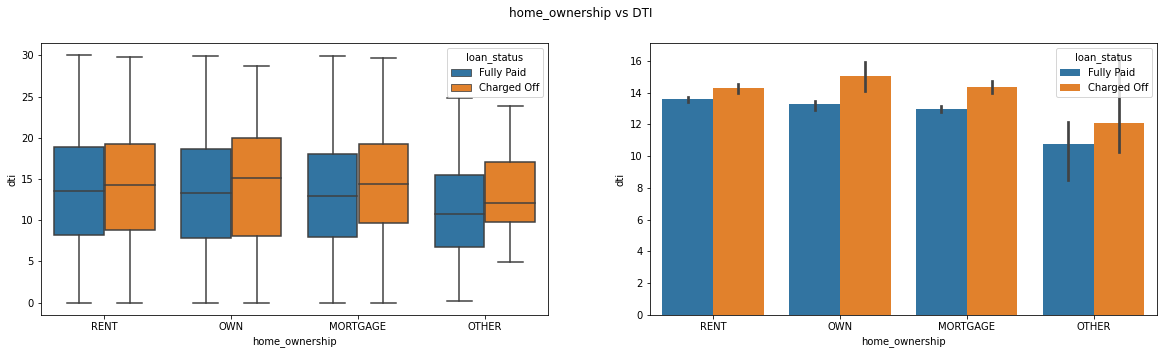

In [153]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

## Observations:

Borrowers in other home ownership category has less dti than other categories.
There is equal posibility of home owners defaulting for all the home ownerships.

## Address State

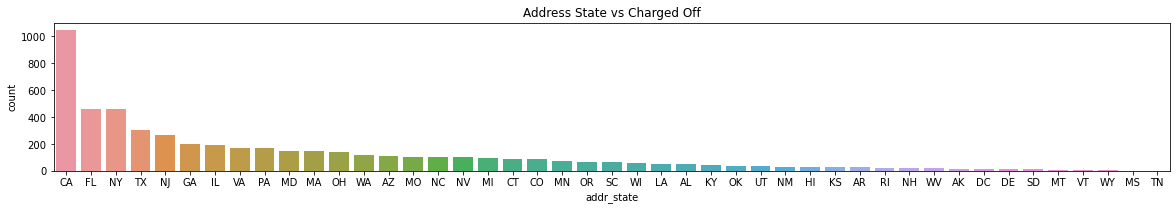

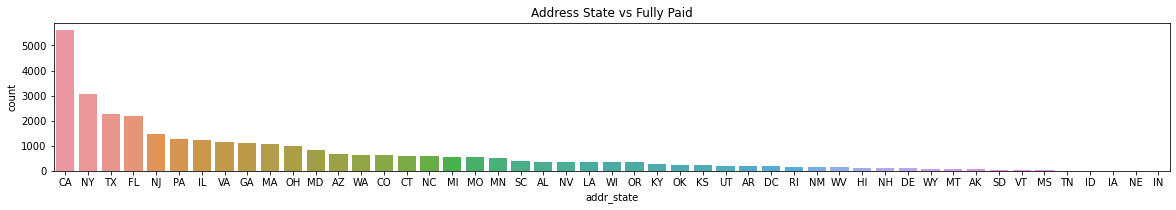

In [154]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

## Observations:
More number of borrowers defaulted in CA , FL and NY states. 



## Verfication Status

Text(0.5, 1.0, 'Grade vs Loan status')

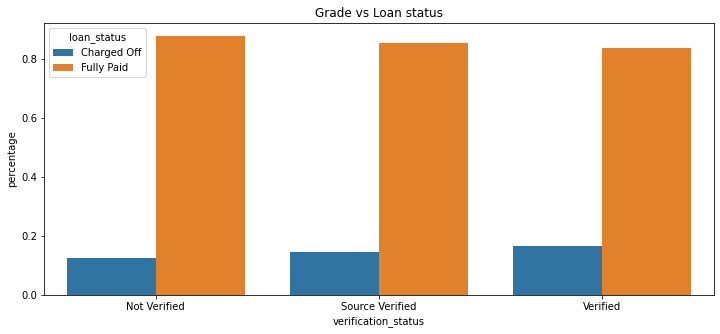

In [155]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

## Observations:
There isn't big change in charged of loans for all varification status.

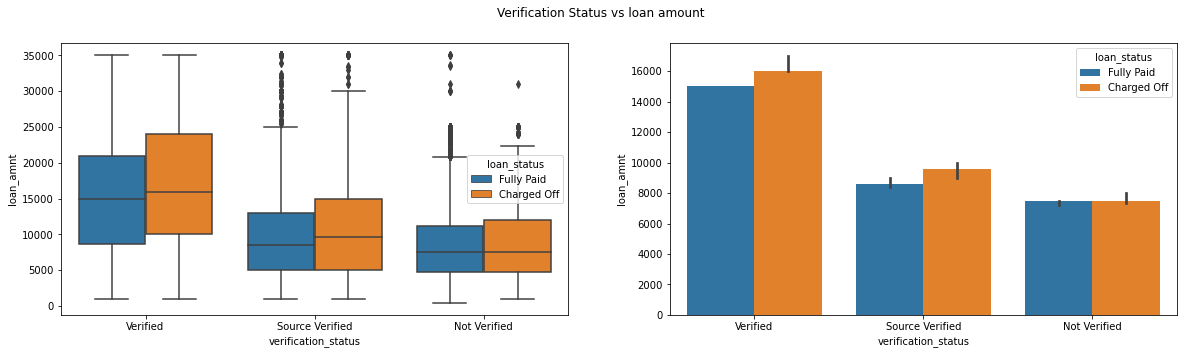

In [156]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

## Observations:

Verified loans are given more loan amounts compared to others.
There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

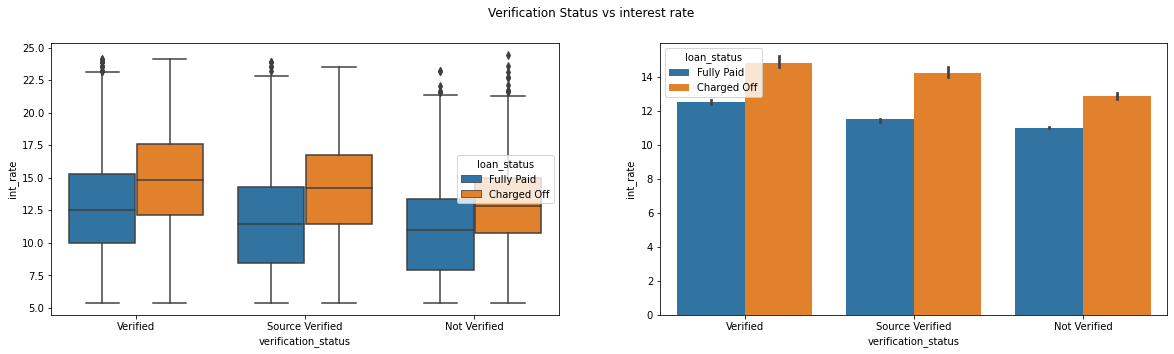

In [157]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

## Observations:
Irrespective of verification status higher interest rates are incurring default of loan.

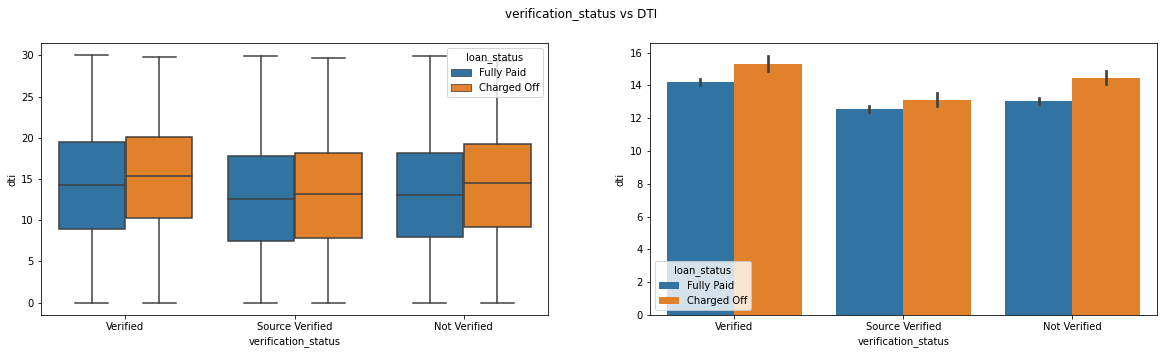

In [158]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

## Observations:
There is slight increase in the dti mean for defaulted laons for all the verification status categories.




## Purpose

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

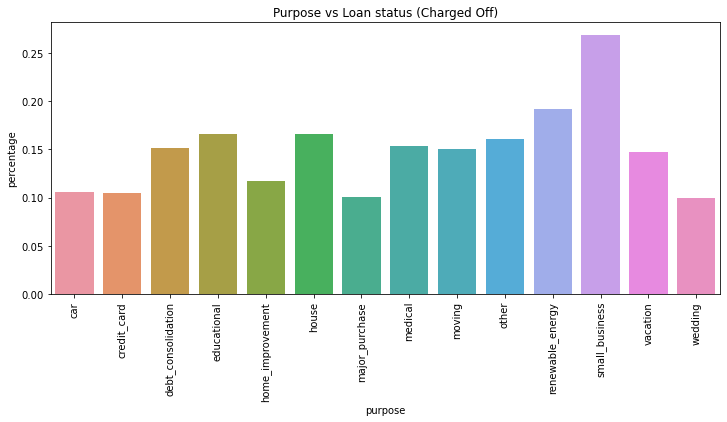

In [159]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

## Observations:
Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

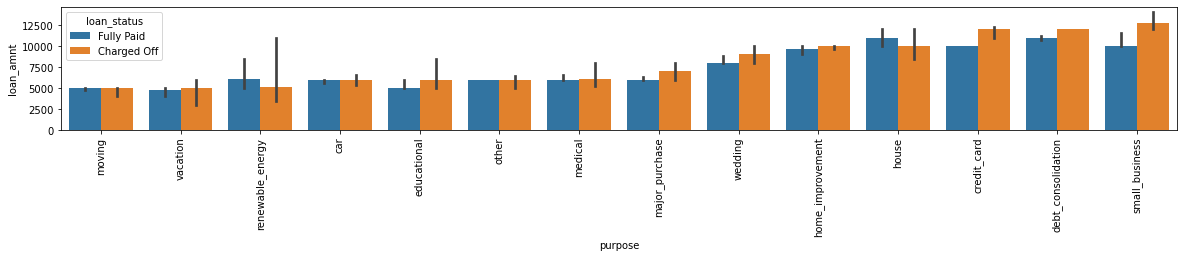

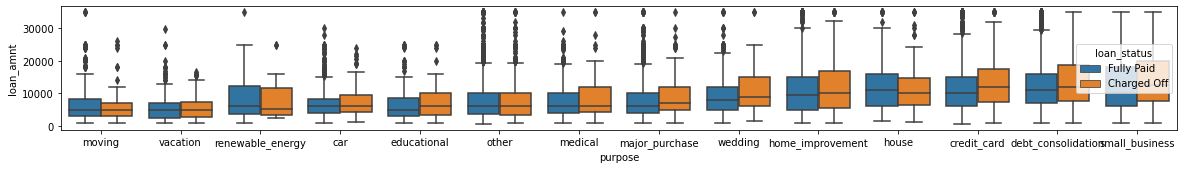

In [160]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

## Observations:
Small Business has more defaults when the loan amount is also high.

<Figure size 432x288 with 0 Axes>

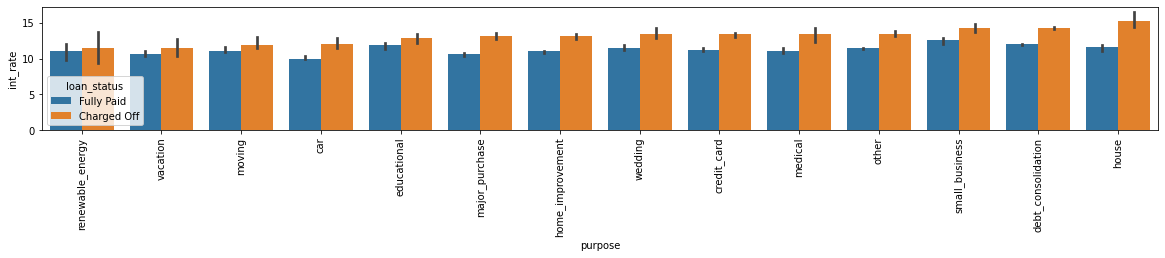

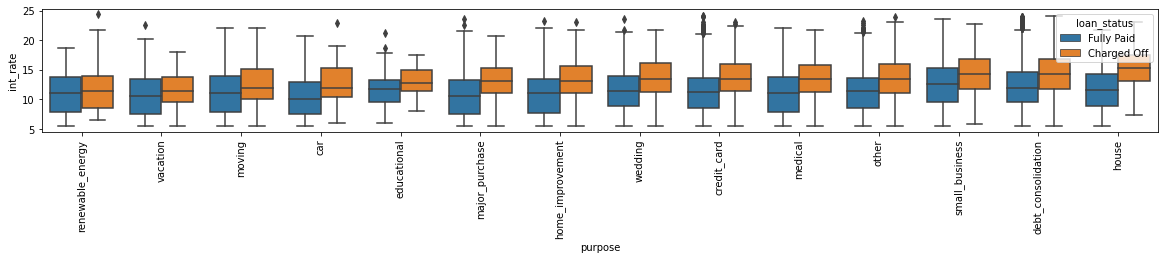

In [161]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

## Observations:
Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

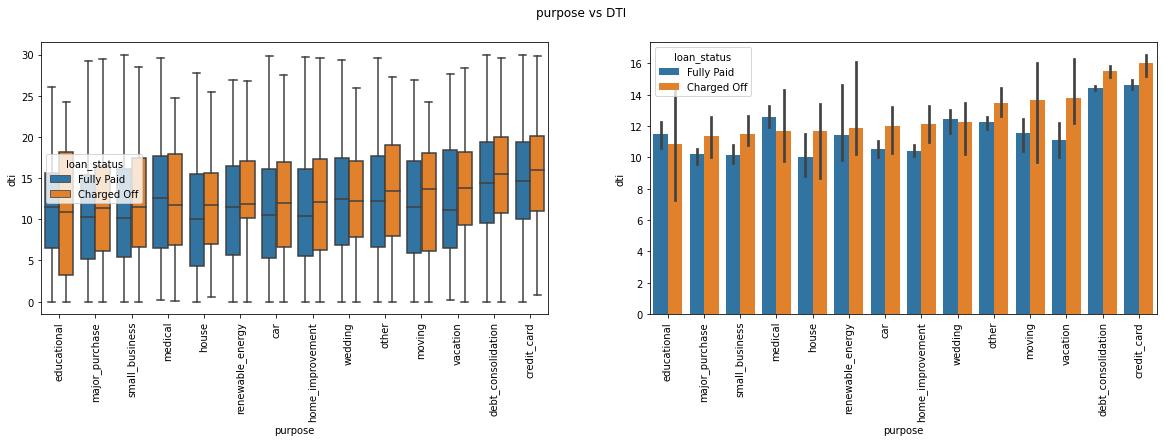

In [163]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

## Observations:
Could not observe any pattern from the charts



## Loan Amount vs Interest Rate

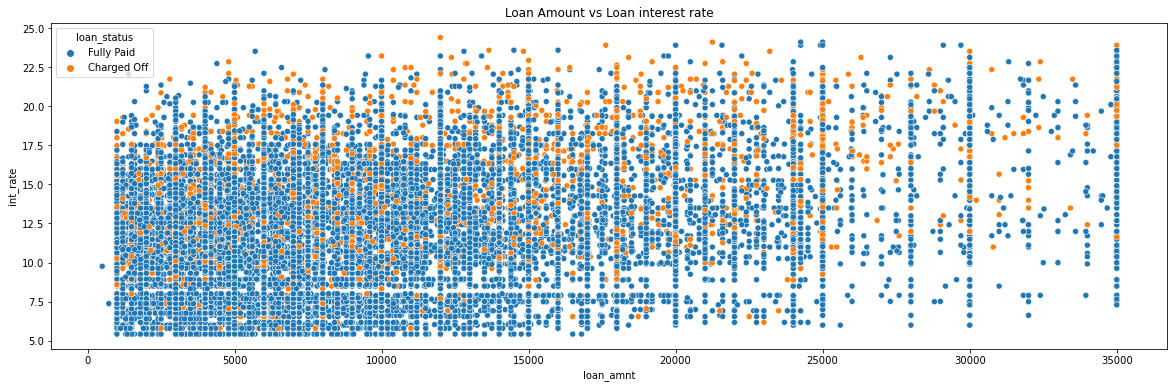

In [164]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

## Observartions:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.





## Loan Amount vs Annual income

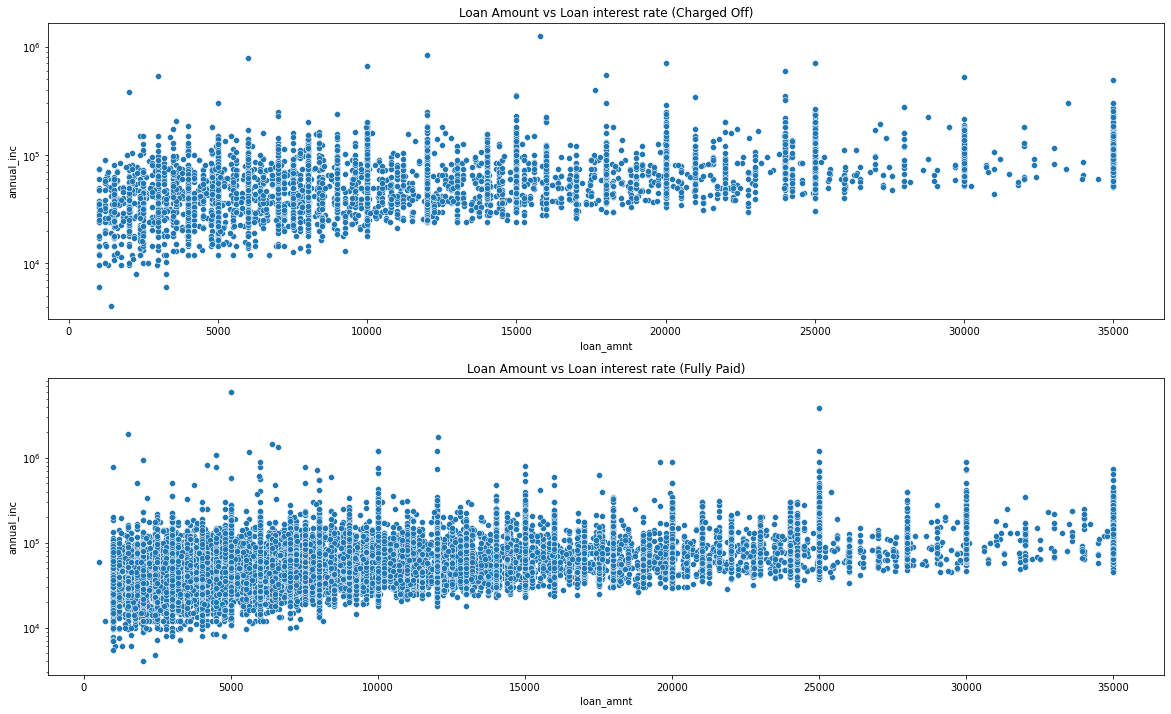

In [165]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

## Observations
Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear patter with a line which has very much less slope.




## Loan Amount vs DTI

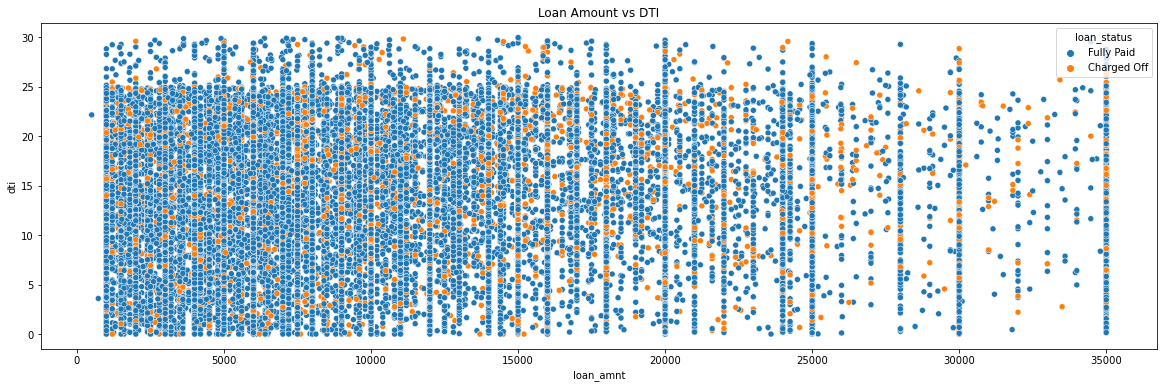

In [166]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

## Observartions:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.




## Interest Rate vs DTI

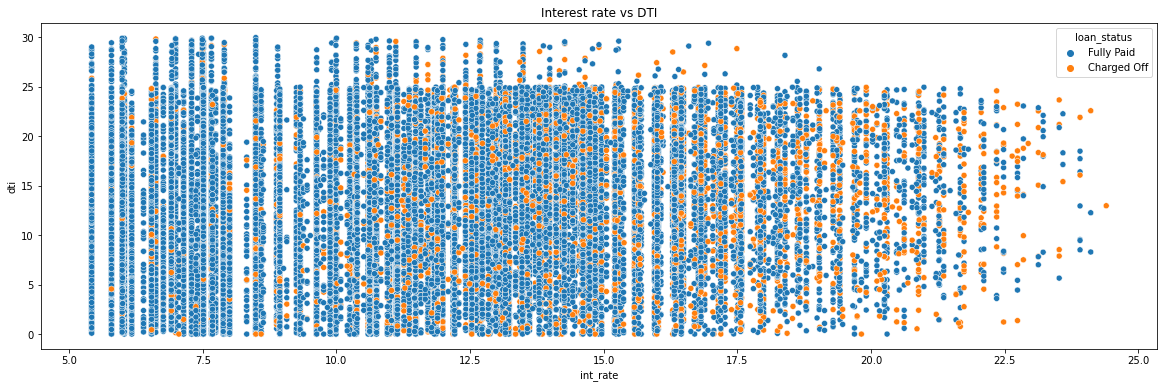

In [167]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

## Observations
Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.






## Correlation Matrix

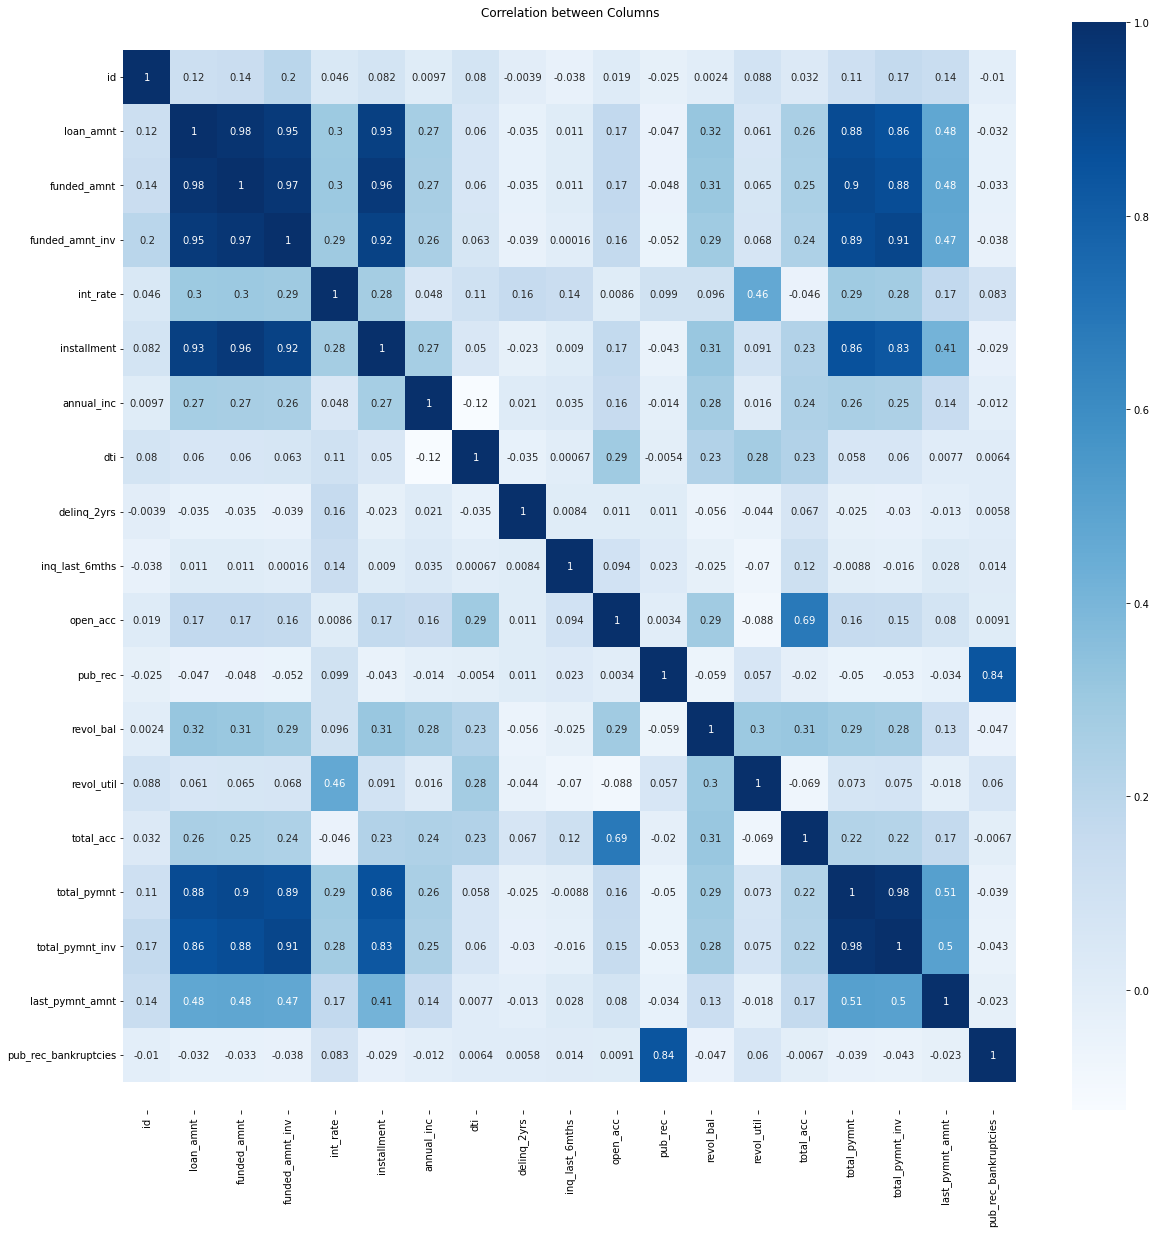

In [168]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

## Observations:

The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.
Interest rates are high for people with high revol utilisation.

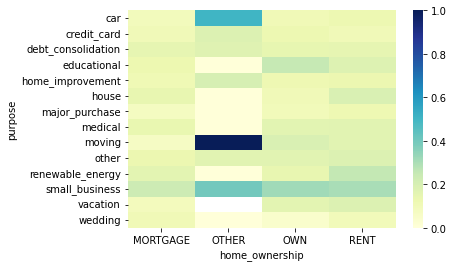

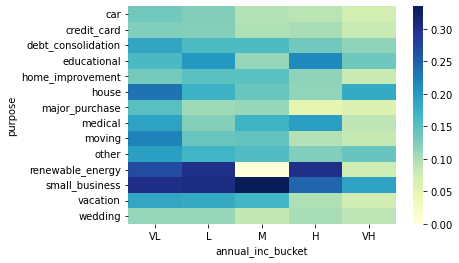

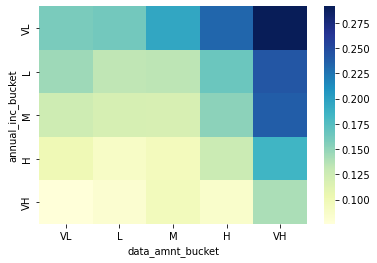

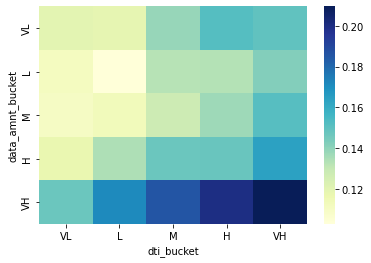

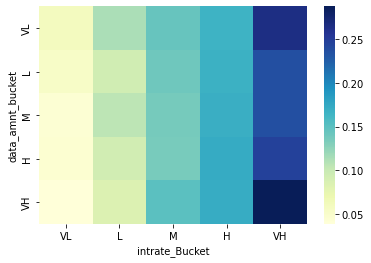

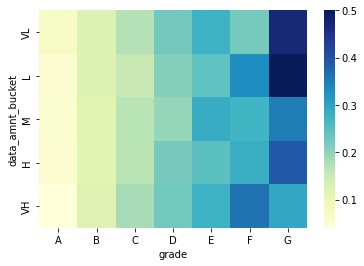

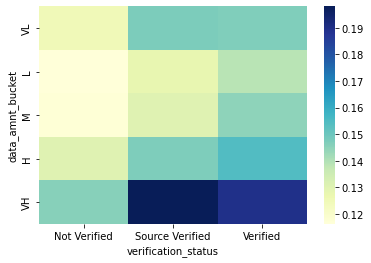

In [235]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
data['loan_status_num'] = data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

#Using heat map to understand the behaviour of univariate variables across other columns
catcolumnsArray = [['purpose','home_ownership'],['purpose','annual_inc_bucket'],['annual_inc_bucket','data_amnt_bucket'],
                   ['data_amnt_bucket','dti_bucket'],['data_amnt_bucket','intrate_Bucket'],['data_amnt_bucket','grade'],['data_amnt_bucket','verification_status']]
for catcolumn in catcolumnsArray:   
    res=pd.pivot_table(data=data, index=catcolumn[0], columns=catcolumn[1], values='loan_status_num',aggfunc='mean') 
    sns.heatmap(res, cmap='YlGnBu')
    plt.show()